# 🏴‍☠️ Pirate Pain Classification Challenge

> ⚓ *"Even pirates feel pain — let's teach the model to feel it too."*

---

## 📚 Table of Contents
0. [README](#readme)  
1. [Setup & Configuration](#setup)  
2. [Data Loading](#data-loading)  
3. [Import Libraries](#import-libraries)  
4. [Data Preprocessing](#data-preprocessing)  
5. [Sequence Building](#sequence-building)  
6. [DataLoaders](#dataloaders)  
7. [Network Hyperparameters](#hyperparameters)
8. [Model Architecture](#model-architecture)  
9. [Training Functions](#training-functions)  
10. [Model Training](#model-training)  
11. [Evaluation & Metrics](#evaluation)  
12. [Model Loading & Final Testing](#model-loading)  
13. [Competition Submission](#submission)

---

### ⚙️ Quick Configuration Map

> 🧭 *"If ye seek to tweak the code, here be where to look!"*

- 🧺 **Batch Size:** → [DataLoaders](#dataloaders)  
- ⚗️ **Hyperparameters:** → [Network Hyperparameters](#hyperparameters)  
- 🪞 **Window Size & Stride:** → [Sequence Building](#sequence-building)  
- ⚙️ **Model Type:** → [Setup & Configuration](#setup)  

---



---

### 💰 Treasure Storage — Models & Submissions
> 🏴‍☠️ *"A wise pirate always knows where his treasure be buried — guard yer models and submissions well!"*

- 💾 **Model & Submission Save/Load Path:** → [Setup & Configuration](#setup)  
  - 🗂️ Models be saved in a **`models/`** folder with the name:
    **`experiment_name_dd-mm-HH-MM.pt`** (day-month-hour-minute).
  - 📜 Submissions be saved in a **`submissions/`** folder with the filename format:  
    **`experiment_name_dd-mm-HH-MM.csv`** .
  - 🔡 All related model parameters are saved in **`models/`** folder with the  name **`experiment_name_dd-mm-HH-MM_config.json`** .

  
  *❗The experiment name is set as **`RnnType_Bi_dd-mm-HH-MM`** or **`RnnType_dd-mm-HH-MM`** depending on if it is bidirectional or not*
---






<a id="readme"></a>
## 0. Info



This section lists all the main parameters that can be modified to control data loading, model behavior, and training.

---

### 📁 File Paths
| Variable | Description | Default Value |
|-----------|--------------|----------------|
| `TRAIN_DATA_PATH` | Training features | `'pirate_pain_train.csv'` |
| `TRAIN_LABELS_PATH` | Training labels | `'pirate_pain_train_labels.csv'` |
| `TEST_DATA_PATH` | Test set for inference | `'pirate_pain_test.csv'` *(optional)* |
| `MODEL_SAVE_PATH` | Output model file | `'pirate_model.pt'` |
| `RESULTS_FILE` | CSV for predictions | `'results_<date-time>.csv'` |

---

### 🧠 Model & Architecture
| Parameter | Description | Typical Values |
|------------|--------------|----------------|
| `model_type` | Choose model class | `'RNN'`, `'LSTM'`, `'GRU'`, `'ANN'` |
| `input_size` | Number of features per time step | *auto-detected from data* |
| `hidden_size` | Hidden layer size | `64`, `128`, `256` |
| `num_layers` | Number of RNN layers | `1-4` |
| `dropout` | Dropout probability | `0.2–0.5` |
| `num_classes` | Output classes (pain levels) | *from label set* |

---

### 🏋️ Training Hyperparameters
| Parameter | Description | Default / Range |
|------------|--------------|-----------------|
| `batch_size` | Samples per batch | `512/2^n` |
| `learning_rate` | Optimizer learning rate | `1e-3` |
| `num_epochs` | Training iterations | `500` |
| `optimizer` | Optimization algorithm | `'AdamW'` |
| `criterion` | Loss function | `CrossEntropyLoss()` |
| `seed` | Random seed for reproducibility | `42` |

---

### 📤 Inference
| Parameter | Description |
|------------|--------------|
| `LOAD_MODEL_PATH` | Path to pretrained `.pt` model (optional) |
| `save_results` | Whether to write output CSV | `True` |

---

> 💡 *Tip:* Adjust hyperparameters in the “Configuration” or “Training Setup” cell before running the notebook.


<a id="setup"></a>
## 1. Setup & Configuration

*Optional: Connect to Google Drive (for Colab users)*

In [123]:
# from google.colab import drive
# drive.mount("/gdrive")
# current_dir = "/gdrive/My\\ Drive/[2025 - 2026]\\ AN2DL/Challenge 1/Personal Challenge 1"
# %cd $current_dir

*Set Model Type*

In [124]:
RNN_TYPE = 'LSTM'            # 'RNN', 'LSTM', or 'GRU'
BIDIRECTIONAL = True        # True / False

*Set Model Save Name*

In [125]:
from datetime import datetime

# Get current date and time for submission filename
current_datetime = datetime.now().strftime("%d-%m-%H-%M")

if BIDIRECTIONAL:
    EXPERIMENT_NAME = f"{RNN_TYPE}_bi_{current_datetime}"
else:
    EXPERIMENT_NAME = f"{RNN_TYPE}_{current_datetime}"

SUBMISSION_FILENAME = f"{EXPERIMENT_NAME}.csv"
print(f"Experiment name: {EXPERIMENT_NAME}")
print(f"Submission filename: {SUBMISSION_FILENAME}")

Experiment name: LSTM_bi_12-11-18-59
Submission filename: LSTM_bi_12-11-18-59.csv


<a id="data-loading"></a>
## 2. Data Loading

Load training and test datasets from CSV files.

In [126]:
import pandas as pd

X_train = pd.read_csv('an2dl2526c1/pirate_pain_train.csv')
y_train = pd.read_csv('an2dl2526c1/pirate_pain_train_labels.csv')

<a id="import-libraries"></a>
## 3. Import Libraries

Set random seeds for reproducibility and import all necessary packages.

In [127]:
# Set seed for reproducibility
SEED = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(SEED)
random.seed(SEED)

# Import PyTorch
import torch
torch.manual_seed(SEED)
from torch import nn
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import TensorDataset, DataLoader

# Directory configuration
logs_dir = "tensorboard"
models_dir = "models"



# Model save/load paths
MODEL_SAVE_PATH = f"{models_dir}/{EXPERIMENT_NAME}_model.pt"
MODEL_LOAD_PATH = f"{models_dir}/{EXPERIMENT_NAME}_model.pt"

!pkill -f tensorboard
%load_ext tensorboard
!mkdir -p {models_dir}

if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")

print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")

# Import other libraries
import copy
import shutil
from datetime import datetime
from itertools import product
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'pkill' is not recognized as an internal or external command,
operable program or batch file.


PyTorch version: 2.10.0.dev20251109+cu128
Device: cuda


A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file models already exists.
Error occurred while processing: models.


<a id="data-preprocessing"></a>
## 4. Data Preprocessing

Explore data, split into train/val/test sets, normalize features, and encode labels.

In [128]:
# Print the shape of the dataset
print(f"Dataset shape: {X_train.shape}")

# Display the first few rows of the dataset
X_train.head(10)

Dataset shape: (105760, 40)


,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0,0,2,0,2,1,two,two,two,1.094705,...,3.499558e-06,1.945042e-06,3.999558e-06,1.153299e-05,0.000004,0.017592,0.013508,0.026798,0.027815,0.5
1,0,1,2,2,2,2,two,two,two,1.135183,...,3.976952e-07,6.765107e-07,6.019627e-06,4.643774e-08,0.000000,0.013352,0.000000,0.013377,0.013716,0.5
2,0,2,2,0,2,2,two,two,two,1.080745,...,1.533820e-07,1.698525e-07,1.446051e-06,2.424536e-06,0.000003,0.016225,0.008110,0.024097,0.023105,0.5
3,0,3,2,2,2,2,two,two,two,0.938017,...,1.006865e-05,5.511079e-07,1.847597e-06,5.432416e-08,0.000000,0.011832,0.007450,0.028613,0.024648,0.5
4,0,4,2,2,2,2,two,two,two,1.090185,...,4.437266e-06,1.735459e-07,1.552722e-06,5.825366e-08,0.000007,0.005360,0.002532,0.033026,0.025328,0.5
5,0,5,2,0,2,1,two,two,two,1.146031,...,1.073167e-06,1.753837e-07,2.957340e-07,6.217311e-08,0.000007,0.006150,0.006444,0.033101,0.023767,0.5
6,0,6,2,1,2,1,two,two,two,1.025870,...,1.074800e-06,1.772156e-07,1.976558e-06,1.576086e-06,0.000005,0.006495,0.006421,0.031804,0.019056,0.5
7,0,7,2,2,2,2,two,two,two,1.038597,...,8.829074e-07,1.790415e-07,2.210562e-06,1.485741e-06,0.000000,0.015998,0.005397,0.035552,0.015732,0.5
8,0,8,2,2,0,1,two,two,two,0.984251,...,1.621055e-06,1.165161e-06,3.030164e-07,5.416678e-07,0.000000,0.020539,0.008517,0.008635,0.015257,0.5
9,0,9,0,2,2,2,two,two,two,1.054999,...,1.609114e-06,3.959558e-06,2.017157e-06,1.154349e-06,0.000007,0.007682,0.021383,0.034006,0.028966,0.5


### 4.1 Data Exploration

In [129]:
from sklearn.preprocessing import LabelEncoder

# Merge features and labels
data = X_train.merge(y_train, on='sample_index')

# Create a mapping dictionary to convert categorical labels to numerical values
# map_dict = {'none': 0, 'one': 1, 'two': 2}
# data['n_legs'] = data['n_legs'].map(map_dict)
# data['n_hands'] = data['n_hands'].map(map_dict)
# data['n_eyes'] = data['n_eyes'].map(map_dict)

# print("Loading test dataset for final evaluation...")

cols = ['n_legs', 'n_hands', 'n_eyes']
unique_values = {col: X_train[col].unique().tolist() for col in cols}

unique_values

{'n_legs': ['two', 'one+peg_leg'],
 'n_hands': ['two', 'one+hook_hand'],
 'n_eyes': ['two', 'one+eye_patch']}

In [130]:
map_dict = {'two': 2, 'one+peg_leg': 1}
data['n_legs'] = data['n_legs'].map(map_dict)

map_dict = {'two': 2, 'one+hook_hand': 1}
data['n_hands'] = data['n_hands'].map(map_dict)

map_dict = {'two': 2, 'one+eye_patch': 1}
data['n_eyes'] = data['n_eyes'].map(map_dict)

print("Mapped string columns to numeric values!")
print(data.head())


map_dict = {'two': 2, 'one+peg_leg': 1}
data['n_legs'] = data['n_legs'].map(map_dict)

map_dict = {'two': 2, 'one+hook_hand': 1}
data['n_hands'] = data['n_hands'].map(map_dict)

map_dict = {'two': 2, 'one+eye_patch': 1}
data['n_eyes'] = data['n_eyes'].map(map_dict)

print("Mapped string columns to numeric values!")
print(data.head())

Mapped string columns to numeric values!
   sample_index  time  pain_survey_1  pain_survey_2  pain_survey_3  \
0             0     0              2              0              2   
1             0     1              2              2              2   
2             0     2              2              0              2   
3             0     3              2              2              2   
4             0     4              2              2              2   

   pain_survey_4  n_legs  n_hands  n_eyes  joint_00  ...      joint_22  \
0              1       2        2       2  1.094705  ...  1.945042e-06   
1              2       2        2       2  1.135183  ...  6.765107e-07   
2              2       2        2       2  1.080745  ...  1.698525e-07   
3              2       2        2       2  0.938017  ...  5.511079e-07   
4              2       2        2       2  1.090185  ...  1.735459e-07   

   joint_23      joint_24  joint_25  joint_26  joint_27  joint_28  joint_29  \
0  0.000004  1

In [131]:
data['n_hands'].max(), data['n_hands'].min()

(np.float64(nan), np.float64(nan))

In [90]:
data.describe()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
count,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,0.0,0.0,0.0,105760.000000,...,1.057600e+05,1.057600e+05,1.057600e+05,1.057600e+05,1.057600e+05,105760.000000,105760.000000,105760.000000,105760.000000,105760.0
mean,330.000000,79.500000,1.633746,1.654851,1.653640,1.663134,NaN,NaN,NaN,0.943095,...,3.972126e-05,4.176794e-05,3.561780e-05,3.138109e-05,1.024604e-04,0.041905,0.058244,0.049886,0.062273,0.5
std,190.814948,46.187338,0.682423,0.669639,0.666649,0.661994,NaN,NaN,NaN,0.202051,...,4.974496e-03,5.472244e-03,1.235450e-03,4.062914e-04,3.206128e-03,0.060293,0.079819,0.060773,0.072597,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,...,0.000000e+00,1.510494e-07,0.000000e+00,1.063144e-08,0.000000e+00,0.000203,0.000000,0.000000,0.000000,0.5
25%,165.000000,39.750000,2.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,0.828277,...,6.545878e-08,3.321650e-07,3.275038e-07,2.841805e-07,7.161332e-07,0.009885,0.012652,0.016290,0.019638,0.5
50%,330.000000,79.500000,2.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,1.005126,...,8.302747e-07,1.095971e-06,1.024209e-06,8.746147e-07,3.126723e-06,0.021898,0.031739,0.031843,0.039041,0.5
75%,495.000000,119.250000,2.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,1.081039,...,2.800090e-06,3.079465e-06,3.021830e-06,2.507548e-06,9.946107e-06,0.048579,0.071051,0.058741,0.079518,0.5
max,660.000000,159.000000,2.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,1.407968,...,1.442198e+00,1.305001e+00,2.742411e-01,3.643074e-02,9.473540e-01,1.223617,1.187419,1.412037,1.370765,0.5


In [132]:
data.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30,label
0,0,0,2,0,2,1,NaN,NaN,NaN,1.094705,...,1.945042e-06,0.000004,1.153299e-05,0.000004,0.017592,0.013508,0.026798,0.027815,0.5,no_pain
1,0,1,2,2,2,2,NaN,NaN,NaN,1.135183,...,6.765107e-07,0.000006,4.643774e-08,0.000000,0.013352,0.000000,0.013377,0.013716,0.5,no_pain
2,0,2,2,0,2,2,NaN,NaN,NaN,1.080745,...,1.698525e-07,0.000001,2.424536e-06,0.000003,0.016225,0.008110,0.024097,0.023105,0.5,no_pain
3,0,3,2,2,2,2,NaN,NaN,NaN,0.938017,...,5.511079e-07,0.000002,5.432416e-08,0.000000,0.011832,0.007450,0.028613,0.024648,0.5,no_pain
4,0,4,2,2,2,2,NaN,NaN,NaN,1.090185,...,1.735459e-07,0.000002,5.825366e-08,0.000007,0.005360,0.002532,0.033026,0.025328,0.5,no_pain


## Preprocessing testing dataset

In [133]:
# Load the actual test dataset (this doesn't have labels)
X_test_final_df = pd.read_csv('an2dl2526c1/pirate_pain_test.csv')

# Map string columns to numeric values first
map_dict = {'two': 2, 'one+peg_leg': 1}
X_test_final_df['n_legs'] = X_test_final_df['n_legs'].map(map_dict)

map_dict = {'two': 2, 'one+hook_hand': 1}
X_test_final_df['n_hands'] = X_test_final_df['n_hands'].map(map_dict)

map_dict = {'two': 2, 'one+eye_patch': 1}
X_test_final_df['n_eyes'] = X_test_final_df['n_eyes'].map(map_dict)

print("Mapped string columns to numeric values!")
print(X_test_final_df.head())

# Now convert inputs from float64 to float32
X_test_final_df = X_test_final_df.astype(np.float32)

Mapped string columns to numeric values!
   sample_index  time  pain_survey_1  pain_survey_2  pain_survey_3  \
0             0     0              2              2              2   
1             0     1              2              2              2   
2             0     2              2              2              2   
3             0     3              1              2              2   
4             0     4              2              2              2   

   pain_survey_4  n_legs  n_hands  n_eyes  joint_00  ...  joint_21  joint_22  \
0              2       2        2       2  0.842535  ...  0.000003  0.000004   
1              2       2        2       2  0.898836  ...  0.000003  0.000004   
2              2       2        2       2  0.957765  ...  0.000006  0.000004   
3              2       2        2       2  0.832596  ...  0.000005  0.000004   
4              0       2        2       2  0.805971  ...  0.000006  0.000004   

   joint_23  joint_24  joint_25  joint_26  joint_27  join

In [134]:
def build_sequences_test(df, window=200, stride=200):
    assert window % stride == 0

    dataset = []

    # Get feature columns (exclude sample_index and time)
    columns = [col for col in df.columns if col not in ['sample_index', 'time']]

    for id in df['sample_index'].unique():
        temp = df[df['sample_index'] == id][columns].values

        # Padding
        padding_len = (window - len(temp) % window) % window
        padding = np.zeros((padding_len, len(columns)), dtype='float32')
        temp = np.concatenate((temp, padding))

        # Build windows
        idx = 0
        while idx + window <= len(temp):
            dataset.append(temp[idx:idx + window])
            idx += stride

    return np.array(dataset)

In [135]:
# ------ Normalize test data ------

# --- Load and preprocess the actual test dataset ---
# Define the columns to be normalised (use training statistics for proper normalization)
# Exclude 'sample_index', 'time', and 'label' as they were excluded during training sequence building
# Also exclude 'joint_30' as it was removed from training data
scale_columns = [col for col in X_test_final_df.columns
                 if col != 'sample_index' and col != 'joint_30']

# Calculate the minimum and maximum values from the training data only
mins_train = X_test_final_df[scale_columns].min()
maxs_train = X_test_final_df[scale_columns].max()

# Apply normalisation to the specified columns in all datasets
for column in scale_columns:
    # Normalise the testing set
    if maxs_train[column] != mins_train[column]:
      X_test_final_df[column] = (X_test_final_df[column] - mins_train[column]) / (maxs_train[column] - mins_train[column])

X_test_final_df.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.561563,...,0.000003,0.000033,0.000048,0.000027,0.000406,0.014909,0.045098,0.012882,0.010178,0.5
1,0.0,0.006289,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.599088,...,0.000003,0.000033,0.000060,0.000021,0.000176,0.053679,0.055375,0.013892,0.029085,0.5
2,0.0,0.012579,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.638365,...,0.000009,0.000033,0.000146,0.000031,0.000049,0.042305,0.039620,0.016286,0.040638,0.5
3,0.0,0.018868,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.554938,...,0.000006,0.000033,0.000047,0.000032,0.000088,0.037477,0.031101,0.008568,0.018730,0.5
4,0.0,0.025157,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.537192,...,0.000008,0.000045,0.000047,0.000021,0.000048,0.015210,0.019426,0.008189,0.013444,0.5


### 4.2 Categorical Encoding

In [136]:
import pandas as pd
import random
from sklearn.model_selection import StratifiedShuffleSplit

# df has columns: ['sample_index', 'label']
N_NO_PAIN_KEEP = 1000   # how many "no_pain" users to keep
N_LOW_PAIN_KEEP = 150   # how many "low_pain" users to keep
N_VAL_USERS = 160
N_TEST_USERS = 3

# --- Step 1: Compute each user's dominant label ---
user_labels = (
    data.groupby('sample_index')['label']
    .agg(lambda x: x.value_counts().index[0])  # dominant label per user
    .reset_index()
)

print("Original label distribution:", user_labels['label'].value_counts().to_dict())

# --- Step 2: Stratified Shuffle Split for train/val/test ---
n_total = len(user_labels)
test_size = (N_VAL_USERS + N_TEST_USERS) / n_total

sss_outer = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
for train_idx, temp_idx in sss_outer.split(user_labels['sample_index'], user_labels['label']):
    train_users = user_labels.iloc[train_idx]['sample_index']
    temp_users = user_labels.iloc[temp_idx]['sample_index']

temp_labels = user_labels[user_labels['sample_index'].isin(temp_users)]

# Split temp into val/test (also stratified)
sss_inner = StratifiedShuffleSplit(n_splits=1, test_size=N_TEST_USERS / (N_VAL_USERS + N_TEST_USERS), random_state=42)
for val_idx, test_idx in sss_inner.split(temp_labels['sample_index'], temp_labels['label']):
    val_users = temp_labels.iloc[val_idx]['sample_index']
    test_users = temp_labels.iloc[test_idx]['sample_index']

# --- Step 3: Partial balancing of the training set ---
train_labels = user_labels[user_labels['sample_index'].isin(train_users)]

print("Train label counts before balancing:", train_labels['label'].value_counts().to_dict())

rng = random.Random(42)
no_pain_users = train_labels[train_labels['label'] == 'no_pain']['sample_index'].tolist()
low_pain_users = train_labels[train_labels['label'] == 'low_pain']['sample_index'].tolist()
high_pain_users = train_labels[train_labels['label'] == 'high_pain']['sample_index'].tolist()

no_pain_keep = min(N_NO_PAIN_KEEP, len(no_pain_users))
low_pain_keep = min(N_LOW_PAIN_KEEP, len(low_pain_users))
high_pain_keep = len(high_pain_users)

selected_no_pain = rng.sample(no_pain_users, no_pain_keep)
selected_low_pain = rng.sample(low_pain_users, low_pain_keep)
selected_high_pain = high_pain_users  # keep all

selected_users = selected_no_pain + selected_low_pain + selected_high_pain
balanced_train_labels = train_labels[train_labels['sample_index'].isin(selected_users)]

print("Train label counts after balancing:", balanced_train_labels['label'].value_counts().to_dict())

train_users = balanced_train_labels['sample_index']

# --- Step 4: Filter the main dataframe ---
df_train = data[data['sample_index'].isin(train_users)]
df_val = data[data['sample_index'].isin(val_users)]
df_test = data[data['sample_index'].isin(test_users)]

# --- Step 5: Display final distributions ---
print("\nLabel proportions:")
print("Train:\n", df_train['label'].value_counts(normalize=True))
print("Val:\n", df_val['label'].value_counts(normalize=True))
print("Test:\n", df_test['label'].value_counts(normalize=True))


Original label distribution: {'no_pain': 511, 'low_pain': 94, 'high_pain': 56}
Train label counts before balancing: {'no_pain': 385, 'low_pain': 71, 'high_pain': 42}
Train label counts after balancing: {'no_pain': 385, 'low_pain': 71, 'high_pain': 42}

Label proportions:
Train:
 label
no_pain      0.773092
low_pain     0.142570
high_pain    0.084337
Name: proportion, dtype: float64
Val:
 label
no_pain      0.7750
low_pain     0.1375
high_pain    0.0875
Name: proportion, dtype: float64
Test:
 label
no_pain     0.666667
low_pain    0.333333
Name: proportion, dtype: float64


In [96]:
df_train

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30,label
0,0,0,2,0,2,1,NaN,NaN,NaN,1.094705,...,1.945042e-06,3.999558e-06,1.153299e-05,3.805930e-06,0.017592,0.013508,0.026798,0.027815,0.5,no_pain
1,0,1,2,2,2,2,NaN,NaN,NaN,1.135183,...,6.765107e-07,6.019627e-06,4.643774e-08,0.000000e+00,0.013352,0.000000,0.013377,0.013716,0.5,no_pain
2,0,2,2,0,2,2,NaN,NaN,NaN,1.080745,...,1.698525e-07,1.446051e-06,2.424536e-06,2.513519e-06,0.016225,0.008110,0.024097,0.023105,0.5,no_pain
3,0,3,2,2,2,2,NaN,NaN,NaN,0.938017,...,5.511079e-07,1.847597e-06,5.432416e-08,0.000000e+00,0.011832,0.007450,0.028613,0.024648,0.5,no_pain
4,0,4,2,2,2,2,NaN,NaN,NaN,1.090185,...,1.735459e-07,1.552722e-06,5.825366e-08,7.044832e-06,0.005360,0.002532,0.033026,0.025328,0.5,no_pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105755,660,155,2,2,0,0,NaN,NaN,NaN,1.051738,...,3.586810e-07,2.929207e-09,3.722175e-07,9.919764e-07,0.007856,0.026876,0.173566,0.221921,0.5,no_pain
105756,660,156,2,2,0,2,NaN,NaN,NaN,1.027651,...,3.588733e-07,0.000000e+00,2.059047e-07,3.802923e-06,0.026795,0.012778,0.075945,0.116763,0.5,no_pain
105757,660,157,0,2,2,2,NaN,NaN,NaN,1.113381,...,3.590534e-07,2.422390e-06,2.029416e-07,6.218436e-06,0.036982,0.028014,0.075978,0.078339,0.5,no_pain
105758,660,158,2,2,2,2,NaN,NaN,NaN,1.058100,...,3.592213e-07,6.060577e-07,1.999436e-07,9.895764e-07,0.046405,0.017922,0.097109,0.106807,0.5,no_pain


In [97]:
# import pandas as pd
# import random
# from sklearn.model_selection import train_test_split

# # df has columns: ['sample_index', 'label']
# N_NO_PAIN_KEEP = 1000   # how many "no_pain" pirates to keep in the training set (lower it to have a more balanced distribution of the labels)
# N_LOW_PAIN_KEEP = 150   # how many "low_pain" pirates to keep in the training set
# N_VAL_USERS = 160
# N_TEST_USERS = 3

# # --- Step 1: Compute each user's dominant label (or label distribution)
# user_labels = (
#     data.groupby('sample_index')['label']
#     .agg(lambda x: x.value_counts().index[0])  # dominant label per user
#     .reset_index()
# )

# print("Original label distribution:", user_labels['label'].value_counts().to_dict())

# # --- Step 2: Split into train/val/test keeping real label proportions
# train_users, temp_users = train_test_split(
#     user_labels['sample_index'],
#     test_size=(N_VAL_USERS + N_TEST_USERS) / len(user_labels),
#     stratify=user_labels['label'],
#     random_state=None
# )

# # Split temp into val/test (also stratified)
# temp_labels = user_labels[user_labels['sample_index'].isin(temp_users)]

# val_users, test_users = train_test_split(
#     temp_labels['sample_index'],
#     test_size=N_TEST_USERS / (N_VAL_USERS + N_TEST_USERS),
#     stratify=temp_labels['label'],
#     random_state=None
# )


# # === Step 3: Create a partially balanced training set keeping a fixed number of pirates per label ===
# train_labels = user_labels[user_labels['sample_index'].isin(train_users)]

# # Count of how many pirates are present for each label in training set
# label_counts = train_labels['label'].value_counts()
# print("Train label counts before balancing:", label_counts.to_dict())

# # --- Custom undersampling logic ---
# rng = random.Random()

# no_pain_users = train_labels[train_labels['label'] == 'no_pain']['sample_index'].tolist()
# low_pain_users = train_labels[train_labels['label'] == 'low_pain']['sample_index'].tolist()
# high_pain_users = train_labels[train_labels['label'] == 'high_pain']['sample_index'].tolist()

# # Choose how many to keep for each label
# no_pain_keep = min(N_NO_PAIN_KEEP, len(no_pain_users))
# low_pain_keep = min(N_LOW_PAIN_KEEP, len(low_pain_users))
# high_pain_keep = len(high_pain_users)  # keep all high_pain pirates

# selected_no_pain = rng.sample(no_pain_users, no_pain_keep)
# selected_low_pain = rng.sample(low_pain_users, low_pain_keep)
# selected_high_pain = high_pain_users  # keep all

# # Combine the selected users
# selected_users = selected_no_pain + selected_low_pain + selected_high_pain
# balanced_train_labels = train_labels[train_labels['sample_index'].isin(selected_users)]

# print("Train label counts after balancing:", balanced_train_labels['label'].value_counts().to_dict())

# train_users = balanced_train_labels['sample_index']

# # Compute validation and test label distributions
# val_label_counts = user_labels[user_labels['sample_index'].isin(val_users)]['label'].value_counts().to_dict()
# test_label_counts = user_labels[user_labels['sample_index'].isin(test_users)]['label'].value_counts().to_dict()
# print("Validation and Test distributions:")
# print("Validation label counts:", val_label_counts)
# print("Test label counts:", test_label_counts)


# # --- Step 4: Filter your main df
# df_train = data[data['sample_index'].isin(train_users)]
# df_val = data[data['sample_index'].isin(val_users)]
# df_test = data[data['sample_index'].isin(test_users)]

# # --- Step 5: Check label proportions
# print("Label proportions:")
# print("Train:\n", df_train['label'].value_counts(normalize=True))
# print("Val:\n", df_val['label'].value_counts(normalize=True))
# print("Test:\n", df_test['label'].value_counts(normalize=True))

### 4.3 Stratified Train/Val/Test Split

In [98]:
df_train.shape, df_val.shape, df_test.shape

((79680, 41), (25600, 41), (480, 41))

In [99]:
# Print the total number of pirates for each dataset
print(f"Total pirates in training set: {df_train['sample_index'].nunique()}")
print(f"Total pirates in validation set: {df_val['sample_index'].nunique()}")
print(f"Total pirates in test set: {df_test['sample_index'].nunique()}")

Total pirates in training set: 498
Total pirates in validation set: 160
Total pirates in test set: 3


In [100]:
df_train

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30,label
0,0,0,2,0,2,1,NaN,NaN,NaN,1.094705,...,1.945042e-06,3.999558e-06,1.153299e-05,3.805930e-06,0.017592,0.013508,0.026798,0.027815,0.5,no_pain
1,0,1,2,2,2,2,NaN,NaN,NaN,1.135183,...,6.765107e-07,6.019627e-06,4.643774e-08,0.000000e+00,0.013352,0.000000,0.013377,0.013716,0.5,no_pain
2,0,2,2,0,2,2,NaN,NaN,NaN,1.080745,...,1.698525e-07,1.446051e-06,2.424536e-06,2.513519e-06,0.016225,0.008110,0.024097,0.023105,0.5,no_pain
3,0,3,2,2,2,2,NaN,NaN,NaN,0.938017,...,5.511079e-07,1.847597e-06,5.432416e-08,0.000000e+00,0.011832,0.007450,0.028613,0.024648,0.5,no_pain
4,0,4,2,2,2,2,NaN,NaN,NaN,1.090185,...,1.735459e-07,1.552722e-06,5.825366e-08,7.044832e-06,0.005360,0.002532,0.033026,0.025328,0.5,no_pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105755,660,155,2,2,0,0,NaN,NaN,NaN,1.051738,...,3.586810e-07,2.929207e-09,3.722175e-07,9.919764e-07,0.007856,0.026876,0.173566,0.221921,0.5,no_pain
105756,660,156,2,2,0,2,NaN,NaN,NaN,1.027651,...,3.588733e-07,0.000000e+00,2.059047e-07,3.802923e-06,0.026795,0.012778,0.075945,0.116763,0.5,no_pain
105757,660,157,0,2,2,2,NaN,NaN,NaN,1.113381,...,3.590534e-07,2.422390e-06,2.029416e-07,6.218436e-06,0.036982,0.028014,0.075978,0.078339,0.5,no_pain
105758,660,158,2,2,2,2,NaN,NaN,NaN,1.058100,...,3.592213e-07,6.060577e-07,1.999436e-07,9.895764e-07,0.046405,0.017922,0.097109,0.106807,0.5,no_pain


In [101]:
data_no_pain = data[data['label'] == 'no_pain']
data_no_pain['joint_00'].mean()

np.float64(0.9600490053935573)

In [102]:
data_no_pain['joint_00'].var()

np.float64(0.03259213768774184)

In [103]:
data_low_pain = data[data['label'] == 'low_pain']
data_low_pain['joint_00'].mean()

np.float64(0.8776655637118013)

In [106]:
scale_columns = [col for col in data.columns
                 if col != 'sample_index' and col != 'joint_30' and col != 'label']

# Calculate the minimum and maximum values from the training data only
mins_train = df_train[scale_columns].min()
maxs_train = df_train[scale_columns].max()

mins_val = df_val[scale_columns].min()
maxs_val = df_val[scale_columns].max()

mins_test = df_test[scale_columns].min()
maxs_test = df_test[scale_columns].max()

# Apply normalisation to the specified columns in all datasets
for column in scale_columns:
    if maxs_train[column] != mins_train[column] and mins_val[column] != maxs_val[column] and mins_test[column] != maxs_test[column]:
      df_train[column] = (df_train[column] - mins_train[column]) / (maxs_train[column] - mins_train[column])

      # Normalise the validation set
      df_val[column] = (df_val[column] - mins_val[column]) / (maxs_val[column] - mins_val[column])

      # Normalise the test set
      df_test[column] = (df_test[column] - mins_test[column]) / (maxs_test[column] - mins_test[column])

    # elif column == 'n_hands' or column == 'n_eyes' or column == 'n_legs':
    #   df_train[column] = 0.5
    #   df_val[column] = 0.5
    #   df_test[column] = 0.5

# Check if the n_legs, n_hands, n_eyes columns have nan values after normalization
for col in ['n_legs', 'n_hands', 'n_eyes']:
    if df_train[col].isnull().any():
        df_train[col] = 1.0
    if df_val[col].isnull().any():
        df_val[col] = 1.0
    if df_test[col].isnull().any():
        df_test[col] = 1.0


In [108]:
df_train['n_eyes'].max(), df_train['n_eyes'].min()

(np.float64(1.0), np.float64(1.0))

In [107]:
df_train

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30,label
0,0,0.000000,1.0,0.0,1.0,0.5,1.0,1.0,1.0,0.777046,...,1.503263e-06,1.052579e-04,0.000405,0.000004,0.014214,0.011376,0.018978,0.020291,0.5,no_pain
1,0,0.006289,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.805855,...,4.403064e-07,1.584208e-04,0.000001,0.000000,0.010748,0.000000,0.009473,0.010006,0.5,no_pain
2,0,0.012579,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.767110,...,1.575589e-08,3.805628e-05,0.000085,0.000003,0.013097,0.006830,0.017065,0.016856,0.5,no_pain
3,0,0.018868,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.665528,...,3.352260e-07,4.862392e-05,0.000002,0.000000,0.009505,0.006274,0.020264,0.017981,0.5,no_pain
4,0,0.025157,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.773829,...,1.885071e-08,4.086358e-05,0.000002,0.000007,0.004216,0.002132,0.023389,0.018477,0.5,no_pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105755,660,0.974843,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.746465,...,1.739834e-07,7.708907e-08,0.000013,0.000001,0.006255,0.022634,0.122919,0.161896,0.5,no_pain
105756,660,0.981132,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.729322,...,1.741445e-07,0.000000e+00,0.000007,0.000004,0.021736,0.010761,0.053784,0.085181,0.5,no_pain
105757,660,0.987421,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.790338,...,1.742954e-07,6.375097e-05,0.000007,0.000007,0.030063,0.023592,0.053808,0.057150,0.5,no_pain
105758,660,0.993711,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.750993,...,1.744361e-07,1.594985e-05,0.000007,0.000001,0.037765,0.015093,0.068772,0.077918,0.5,no_pain


In [25]:
# Define a function to inspect sensor data for a specific label
def inspect_label(label, df):
    # Filter the DataFrame for the specified label and limit to 159 rows
    data = df[df['label'] == label][['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4']][:159]

    # Plot the sensor data for each axis
    axis = data.plot(subplots=True, figsize=(17, 9), title=label)

    # Adjust legend position for each subplot
    for ax in axis:
        ax.legend(loc='lower right')

### 4.4 Feature Normalization

In [26]:
# Initialise a dictionary to count occurrences of each activity in the training set
training_labels = {
    'no_pain': 0,
    'low_pain': 0,
    'high_pain': 0
}

# Count occurrences of each activity for unique IDs in the training set
for id in df_train['sample_index'].unique():
    label = df_train[df_train['sample_index'] == id]['label'].values[0]
    training_labels[label] += 1


#if 'joint_30' in df_train.columns:
#    df_train = df_train.drop(columns=['joint_30']) # we deleted this joint since has no final effect during training

# Print the distribution of training labels
print('Training labels:', training_labels)

# Initialise a dictionary to count occurrences of each activity in the training set
val_labels = {
    'no_pain': 0,
    'low_pain': 0,
    'high_pain': 0
}

# Count occurrences of each activity for unique IDs in the training set
for id in df_val['sample_index'].unique():
    label = df_val[df_val['sample_index'] == id]['label'].values[0]
    val_labels[label] += 1


#if 'joint_30' in df_val.columns:
#    df_val = df_val.drop(columns=['joint_30']) # we deleted this joint since has no final effect during training

# Print the distribution of validation labels
print('Validation labels:', val_labels)

# Initialise a dictionary to count occurrences of each activity in the test set
test_labels = {
    'no_pain': 0,
    'low_pain': 0,
    'high_pain': 0
}

# Count occurrences of each activity for unique IDs in the test set
for id in df_test['sample_index'].unique():
    label = df_test[df_test['sample_index'] == id]['label'].values[0]
    test_labels[label] += 1
#if 'joint_30' in df_test.columns:
#    df_test = df_test.drop(columns=['joint_30']) # we deleted this joint since has no final effect during training

# Print the distribution of test labels
print('Test labels:', test_labels)

Training labels: {'no_pain': 385, 'low_pain': 71, 'high_pain': 42}
Validation labels: {'no_pain': 124, 'low_pain': 22, 'high_pain': 14}
Test labels: {'no_pain': 2, 'low_pain': 1, 'high_pain': 0}


### 4.5 Label Distribution Analysis

In [44]:
# Define a training mapping of label names to integer labels
train_label_mapping = {
    'no_pain': 0,
    'low_pain': 1,
    'high_pain': 2
}

# Map label names to integers in the training set
df_train['label'] = df_train['label'].map(train_label_mapping)

# Define a validation mapping of label names to integer labels
val_label_mapping = {
    'no_pain': 0,
    'low_pain': 1,
    'high_pain': 2
}

# Map label names to integers in the validation set
df_val['label'] = df_val['label'].map(val_label_mapping)

test_label_mapping = {
    'no_pain': 0,
    'low_pain': 1,
    'high_pain': 2
}

# Map label names to integers in the test set
df_test['label'] = df_test['label'].map(test_label_mapping)


<a id="sequence-building"></a>
## 5. Sequence Building

Convert variable-length time-series into fixed-size windows for RNN input.

In [28]:

# Define window and stride boolean variable -> if True, during training we will visit more time the same pirate with overlapping windows
# if False, each pirate will be visited only once during training
one_pirate_window = True

In [29]:
if one_pirate_window:
    # Define the window size
    WINDOW_SIZE = 30 # before: 80

    # Stride size
    STRIDE = 2
else:
    # Define the window size -> select an higher window size in order to get more pirates
    WINDOW_SIZE = 160

    # Stride size
    STRIDE = 160

### 5.1 Window & Stride Configuration

In [ ]:
"""
  GENERAL COMMENTS:
  in this function we are restricting for each user data the number of samples of recorded data to a constant
  value (window size), since every user data could be composed by different numbers of timestep. Therefore we are
  "normalizing" the timesteps of a constant window size. Additionally is also defined a stride variable, which if is equal to
  the window size, then we are not taking overlapping timestamp samples, instead if stride < window, we are letting some samples
  to overlap in such a way that the RNN or other kind of NN architecture will analyze better the context.
"""

# Define a function to build sequences from the dataset
def build_sequences(df, window=200, stride=200):
    # Sanity check to ensure the window is divisible by the stride
    assert window % stride == 0 # checks if the window size is divisible by the stride

    # Initialise lists to store sequences and their corresponding labels
    dataset = []
    labels = []

    # Iterate over unique IDs in the DataFrame
    for id in df['sample_index'].unique():

        # Extract pirate sample index data for the current sample index
        columns = [col for col in df.columns if col not in ['sample_index', 'label', 'time']]

        temp = df[df['sample_index'] == id][columns].values

        # Retrieve the label for the current pirate
        label = df[df['sample_index'] == id]['label'].values[0]

        # Calculate padding length to ensure full windows
        padding_len = window - len(temp) % window

        # Create zero padding and concatenate with the data
        padding = np.zeros((padding_len, len(columns)), dtype='float32')
        temp = np.concatenate((temp, padding))

        # Build feature windows and associate them with labels
        idx = 0
        while idx + window <= len(temp):
            dataset.append(temp[idx:idx + window])
            labels.append(label)
            idx += stride

    # Convert lists to numpy arrays for further processing
    dataset = np.array(dataset)
    labels = np.array(labels)

    return dataset, labels

### 5.2 Build Sequences Function

In [ ]:
# Generate sequences and labels for the training set
X_train, y_train = build_sequences(df_train, WINDOW_SIZE, STRIDE)

# Generate sequences and labels for the validation set
X_val, y_val = build_sequences(df_val, WINDOW_SIZE, STRIDE)

# Generate sequences and labels for the test set
X_test, y_test = build_sequences(df_test, WINDOW_SIZE, STRIDE)

# Print the shapes of the generated datasets and their labels
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((37848, 30, 21), (37848,), (12160, 30, 21), (12160,), (228, 30, 21), (228,))

### 5.3 Generate Sequences for Train/Val/Test

In [ ]:
# Convert dataset into float32 for PyTorch compatibility
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
# y_train = y_train.astype('int64')
# y_val = y_val.astype('int64')
# y_test = y_test.astype('int64')

### 5.4 Data Type Conversion & Cleaning

In [ ]:
# Define the input shape based on the training data
input_shape = X_train.shape[1:]

# Define the number of classes based on the categorical labels
num_classes = len(np.unique(y_train))

In [ ]:
# Discard nan values from the dataset
if np.isnan(X_train).any() or np.isnan(X_val).any() or np.isnan(X_test).any():
    X_train = np.nan_to_num(X_train)
    X_val = np.nan_to_num(X_val)
    X_test = np.nan_to_num(X_test)


In [ ]:
# Convert numpy arrays to PyTorch datasets (pairs features with labels)
train_ds = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

<a id="dataloaders"></a>
## 6. DataLoaders

Create PyTorch DataLoaders for efficient batching and parallel loading.

In [ ]:
# Define the batch size, which is the number of samples in each batch
BATCH_SIZE = 512 # we can change it depending on the GPU RAM available (by default 512)

In [ ]:
def make_loader(ds, batch_size, shuffle, drop_last):
    # Determine optimal number of worker processes for data loading
    cpu_cores = os.cpu_count() or 2
    num_workers = max(2, min(4, cpu_cores))

    # Create DataLoader with performance optimizations
    return DataLoader(
        ds,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers,
        pin_memory=True,  # Faster GPU transfer
        pin_memory_device="cuda" if torch.cuda.is_available() else "",
        prefetch_factor=4,  # Load 4 batches ahead
    )

In [ ]:
# Create data loaders with different settings for each phase
train_loader = make_loader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)
val_loader   = make_loader(val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)
test_loader  = make_loader(test_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

In [ ]:
# Get one batch from the training data loader
for xb, yb in train_loader:
    print("Features batch shape:", xb.shape)
    print("Labels batch shape:", yb.shape)
    break # Stop after getting one batch

Features batch shape: torch.Size([512, 30, 21])
Labels batch shape: torch.Size([512])


In [ ]:
def recurrent_summary(model, input_size):
    """
    Custom summary function that emulates torchinfo's output while correctly
    counting parameters for RNN/GRU/LSTM layers.

    This function is designed for models whose direct children are
    nn.Linear, nn.RNN, nn.GRU, or nn.LSTM layers.

    Args:
        model (nn.Module): The model to analyze.
        input_size (tuple): Shape of the input tensor (e.g., (seq_len, features)).
    """

    # Dictionary to store output shapes captured by forward hooks
    output_shapes = {}
    # List to track hook handles for later removal
    hooks = []

    def get_hook(name):
        """Factory function to create a forward hook for a specific module."""
        def hook(module, input, output):
            # Handle RNN layer outputs (returns a tuple)
            if isinstance(output, tuple):
                # output[0]: all hidden states with shape (batch, seq_len, hidden*directions)
                shape1 = list(output[0].shape)
                shape1[0] = -1  # Replace batch dimension with -1

                # output[1]: final hidden state h_n (or tuple (h_n, c_n) for LSTM)
                if isinstance(output[1], tuple):  # LSTM case: (h_n, c_n)
                    shape2 = list(output[1][0].shape)  # Extract h_n only
                else:  # RNN/GRU case: h_n only
                    shape2 = list(output[1].shape)

                # Replace batch dimension (middle position) with -1
                shape2[1] = -1

                output_shapes[name] = f"[{shape1}, {shape2}]"

            # Handle standard layer outputs (e.g., Linear)
            else:
                shape = list(output.shape)
                shape[0] = -1  # Replace batch dimension with -1
                output_shapes[name] = f"{shape}"
        return hook

    # 1. Determine the device where model parameters reside
    try:
        device = next(model.parameters()).device
    except StopIteration:
        device = torch.device("cpu")  # Fallback for models without parameters

    # 2. Create a dummy input tensor with batch_size=1
    dummy_input = torch.randn(1, *input_size).to(device)

    # 3. Register forward hooks on target layers
    # Iterate through direct children of the model (e.g., self.rnn, self.classifier)
    for name, module in model.named_children():
        if isinstance(module, (nn.Linear, nn.RNN, nn.GRU, nn.LSTM)):
            # Register the hook and store its handle for cleanup
            hook_handle = module.register_forward_hook(get_hook(name))
            hooks.append(hook_handle)

    # 4. Execute a dummy forward pass in evaluation mode
    model.eval()
    with torch.no_grad():
        try:
            model(dummy_input)
        except Exception as e:
            print(f"Error during dummy forward pass: {e}")
            # Clean up hooks even if an error occurs
            for h in hooks:
                h.remove()
            return

    # 5. Remove all registered hooks
    for h in hooks:
        h.remove()

    # --- 6. Print the summary table ---

    print("-" * 79)
    # Column headers
    print(f"{'Layer (type)':<25} {'Output Shape':<28} {'Param #':<18}")
    print("=" * 79)

    total_params = 0
    total_trainable_params = 0

    # Iterate through modules again to collect and display parameter information
    for name, module in model.named_children():
        if name in output_shapes:
            # Count total and trainable parameters for this module
            module_params = sum(p.numel() for p in module.parameters())
            trainable_params = sum(p.numel() for p in module.parameters() if p.requires_grad)

            total_params += module_params
            total_trainable_params += trainable_params

            # Format strings for display
            layer_name = f"{name} ({type(module).__name__})"
            output_shape_str = str(output_shapes[name])
            params_str = f"{trainable_params:,}"

            print(f"{layer_name:<25} {output_shape_str:<28} {params_str:<15}")

    print("=" * 79)
    print(f"Total params: {total_params:,}")
    print(f"Trainable params: {total_trainable_params:,}")
    print(f"Non-trainable params: {total_params - total_trainable_params:,}")
    print("-" * 79)

<a id="hyperparameters"></a>
## 7. Network Hyperparameters

Configure training settings, architecture parameters, and regularization.

In [ ]:
# Training configuration
LEARNING_RATE = 1e-3
EPOCHS = 500
PATIENCE = 50

# Architecture
HIDDEN_LAYERS = 2        # Hidden layers
HIDDEN_SIZE = 25        # Neurons per layer -> prev hidden size = 128

# Regularisation
DROPOUT_RATE = 0.3      # Dropout probability

# For now disable weight decay
L1_LAMBDA = 0.0        # L1 penalty
L2_LAMBDA = 1e-2          # L2 penalty


# Set up loss function and optimizer

# TO GIVE DIFFERENT WEIGHTS TO THE LOSS DEPENDING ON THE INVERSE OF EACH LABEL TOTAL NUMBER:
# Set up loss function and optimizer
# from sklearn.utils.class_weight import compute_class_weight
# classes = np.unique(y_train)
# class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
# class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
# criterion = nn.CrossEntropyLoss(weight=class_weights)

# print(f"Class weights (order = {classes}): {class_weights.cpu().numpy()}")


# TO GIVE FIXED WEIGHTS TO THE LOSS FUNCTION DEPENDING ON THE LABELS DISTRIBUTION:
# weights = torch.tensor([1.0, 1.2, 1.4]).to(device)
# criterion = nn.CrossEntropyLoss(weight=weights)


# TO NOT CHANGE THE WEIGHTS, BUT WITH LABEL SMOOTHING
# criterion = nn.CrossEntropyLoss(label_smoothing=0.1)


# TO WEIGHT MORE THE "MORE DIFFICULT" CASES AND THE LESS FREQUENT LABELS:
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.ce = nn.CrossEntropyLoss(weight=alpha, reduction='none')

    def forward(self, inputs, targets):
        ce_loss = self.ce(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss
        return focal_loss.mean()
alpha = None
# alpha = torch.tensor([0.7, 1.3, 1.7], dtype=torch.float32, device=device)  # None if we don't want to alterate the weights of each label losses (FocalLoss already do it)
criterion = FocalLoss(alpha=alpha, gamma=1.0)  # gamma = 0 it's like Crossentropy(), gamma < 1 it's like in between Crossentropy and FocalLoss,
                                               # gamma = 1 it's a good compromise, gamma = 1.5 or gamma = 2 to weight so much the less present labels

In [ ]:
# Initialize best model tracking variables
best_model = None
best_performance = float('-inf')

<a id="model-architecture"></a>
## 8. Model Architecture

Custom RNN/LSTM/GRU classifier with configurable bidirectionality and dropout.

### 8.1 Recurrent Classifier Class

In [ ]:
class RecurrentClassifier(nn.Module):
    """
    Generic RNN classifier (RNN, LSTM, GRU).
    Uses the last hidden state for classification.
    """
    def __init__(
            self,
            input_size,
            hidden_size,
            num_layers,
            num_classes,
            rnn_type= RNN_TYPE,        # 'RNN', 'LSTM', or 'GRU'
            bidirectional=BIDIRECTIONAL,
            dropout_rate=0.2
            ):
        super().__init__()

        self.rnn_type = rnn_type
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.bidirectional = bidirectional

        # Map string name to PyTorch RNN class
        rnn_map = {
            'RNN': nn.RNN,
            'LSTM': nn.LSTM,
            'GRU': nn.GRU
        }

        if rnn_type not in rnn_map:
            raise ValueError("rnn_type must be 'RNN', 'LSTM', or 'GRU'")

        rnn_module = rnn_map[rnn_type]

        # Dropout is only applied between layers (if num_layers > 1)
        dropout_val = dropout_rate if num_layers > 1 else 0 # dropout between RNN layers, applied for regularization

        # Create the recurrent layer
        self.rnn = rnn_module(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,       # Input shape: (batch, seq_len, features)
            bidirectional=bidirectional, # We are defining a bidirectional RNN since we want to extract also the future contextual information for making better predictions
            dropout=dropout_val
        )

        # Calculate input size for the final classifier
        if self.bidirectional:
            classifier_input_size = hidden_size * 2 # Concat fwd + bwd
        else:
            classifier_input_size = hidden_size

        # Final classification layer
        self.classifier = nn.Linear(classifier_input_size, num_classes) # output layer for classifying

    def forward(self, x):
        """
        x shape: (batch_size, seq_length, input_size)
        """

        # rnn_out shape: (batch_size, seq_len, hidden_size * num_directions)
        rnn_out, hidden = self.rnn(x) # feeds the input sequence into the RNN layer
        # rnn_out -> contains the hidden state output for every timestep

        # LSTM returns (h_n, c_n), we only need h_n
        if self.rnn_type == 'LSTM':
            hidden = hidden[0]  # final hidden state of the last timestep

        # hidden shape: (num_layers * num_directions, batch_size, hidden_size)

        if self.bidirectional:
            # Reshape to (num_layers, 2, batch_size, hidden_size)
            hidden = hidden.view(self.num_layers, 2, -1, self.hidden_size)

            # Concat last fwd (hidden[-1, 0, ...]) and bwd (hidden[-1, 1, ...])
            # Final shape: (batch_size, hidden_size * 2)
            hidden_to_classify = torch.cat([hidden[-1, 0, :, :], hidden[-1, 1, :, :]], dim=1)
        else:
            # Take the last layer's hidden state
            # Final shape: (batch_size, hidden_size)
            hidden_to_classify = hidden[-1]

        # Get logits
        logits = self.classifier(hidden_to_classify)
        return logits

<a id="training-functions"></a>
## 9. Training Functions

Helper functions for training, validation, logging, and early stopping.

In [ ]:
def train_one_epoch(model, train_loader, criterion, optimizer, scaler, device, l1_lambda=0, l2_lambda=0):
    """
    Perform one complete training epoch through the entire training dataset.

    Args:
        model (nn.Module): The neural network model to train
        train_loader (DataLoader): PyTorch DataLoader containing training data batches
        criterion (nn.Module): Loss function (e.g., CrossEntropyLoss, MSELoss)
        optimizer (torch.optim): Optimization algorithm (e.g., Adam, SGD)
        scaler (GradScaler): PyTorch's gradient scaler for mixed precision training
        device (torch.device): Computing device ('cuda' for GPU, 'cpu' for CPU)
        l1_lambda (float): Lambda for L1 regularization
        l2_lambda (float): Lambda for L2 regularization

    Returns:
        tuple: (average_loss, f1 score) - Training loss and f1 score for this epoch
    """
    model.train()  # Set model to training mode

    running_loss = 0.0
    all_predictions = []
    all_targets = []

    # Iterate through training batches
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Move data to device (GPU/CPU)
        inputs, targets = inputs.to(device), targets.to(device)

        # Clear gradients from previous step
        optimizer.zero_grad(set_to_none=True)

        # Forward pass with mixed precision (if CUDA available)
        with torch.amp.autocast(device_type=device.type, enabled=(device.type == 'cuda')):
            logits = model(inputs)
            loss = criterion(logits, targets)

            # Add L1 and L2 regularization
            l1_norm = sum(p.abs().sum() for p in model.parameters())
            l2_norm = sum(p.pow(2).sum() for p in model.parameters())
            loss = loss + l1_lambda * l1_norm + l2_lambda * l2_norm


        # Backward pass with gradient scaling
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # Accumulate metrics
        running_loss += loss.item() * inputs.size(0)
        predictions = logits.argmax(dim=1)
        all_predictions.append(predictions.cpu().numpy())
        all_targets.append(targets.cpu().numpy())

    # Calculate epoch metrics
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_f1 = f1_score(
        np.concatenate(all_targets),
        np.concatenate(all_predictions),
        average='weighted'
    )

    return epoch_loss, epoch_f1

### 9.1 Train One Epoch Function

In [ ]:
def validate_one_epoch(model, val_loader, criterion, device):
    """
    Perform one complete validation epoch through the entire validation dataset.

    Args:
        model (nn.Module): The neural network model to evaluate (must be in eval mode)
        val_loader (DataLoader): PyTorch DataLoader containing validation data batches
        criterion (nn.Module): Loss function used to calculate validation loss
        device (torch.device): Computing device ('cuda' for GPU, 'cpu' for CPU)

    Returns:
        tuple: (average_loss, accuracy) - Validation loss and accuracy for this epoch

    Note:
        This function automatically sets the model to evaluation mode and disables
        gradient computation for efficiency during validation.
    """
    model.eval()  # Set model to evaluation mode

    running_loss = 0.0
    all_predictions = []
    all_targets = []

    # Disable gradient computation for validation
    with torch.no_grad():
        for inputs, targets in val_loader:
            # Move data to device
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass with mixed precision (if CUDA available)
            with torch.amp.autocast(device_type=device.type, enabled=(device.type == 'cuda')):
                logits = model(inputs)
                loss = criterion(logits, targets)

            # Accumulate metrics
            running_loss += loss.item() * inputs.size(0)
            predictions = logits.argmax(dim=1)
            all_predictions.append(predictions.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

    # Calculate epoch metrics
    epoch_loss = running_loss / len(val_loader.dataset)
    epoch_accuracy = f1_score(
        np.concatenate(all_targets),
        np.concatenate(all_predictions),
        average='weighted'
    )

    return epoch_loss, epoch_accuracy

### 9.2 Validate One Epoch Function

In [ ]:
def log_metrics_to_tensorboard(writer, epoch, train_loss, train_f1, val_loss, val_f1, model):
    """
    Log training metrics and model parameters to TensorBoard for visualization.

    Args:
        writer (SummaryWriter): TensorBoard SummaryWriter object for logging
        epoch (int): Current epoch number (used as x-axis in TensorBoard plots)
        train_loss (float): Training loss for this epoch
        train_f1 (float): Training f1 score for this epoch
        val_loss (float): Validation loss for this epoch
        val_f1 (float): Validation f1 score for this epoch
        model (nn.Module): The neural network model (for logging weights/gradients)

    Note:
        This function logs scalar metrics (loss/f1 score) and histograms of model
        parameters and gradients, which helps monitor training progress and detect
        issues like vanishing/exploding gradients.
    """
    # Log scalar metrics
    writer.add_scalar('Loss/Training', train_loss, epoch)
    writer.add_scalar('Loss/Validation', val_loss, epoch)
    writer.add_scalar('F1/Training', train_f1, epoch)
    writer.add_scalar('F1/Validation', val_f1, epoch)

    # Log model parameters and gradients
    for name, param in model.named_parameters():
        if param.requires_grad:
            # Check if the tensor is not empty before adding a histogram
            if param.numel() > 0:
                writer.add_histogram(f'{name}/weights', param.data, epoch)
            if param.grad is not None:
                # Check if the gradient tensor is not empty before adding a histogram
                if param.grad.numel() > 0:
                    if param.grad is not None and torch.isfinite(param.grad).all():
                        writer.add_histogram(f'{name}/gradients', param.grad.data, epoch)

### 9.3 Fit  Function

In [ ]:
def fit(model, train_loader, val_loader, epochs, criterion, optimizer, scaler, device,
        l1_lambda=0, l2_lambda=0, patience=0, evaluation_metric="val_f1", mode='max',
        restore_best_weights=True, writer=None, verbose=10, experiment_name=""):
    """
    Train the neural network model on the training data and validate on the validation data.

    Args:
        model (nn.Module): The neural network model to train
        train_loader (DataLoader): PyTorch DataLoader containing training data batches
        val_loader (DataLoader): PyTorch DataLoader containing validation data batches
        epochs (int): Number of training epochs
        criterion (nn.Module): Loss function (e.g., CrossEntropyLoss, MSELoss)
        optimizer (torch.optim): Optimization algorithm (e.g., Adam, SGD)
        scaler (GradScaler): PyTorch's gradient scaler for mixed precision training
        device (torch.device): Computing device ('cuda' for GPU, 'cpu' for CPU)
        l1_lambda (float): L1 regularization coefficient (default: 0)
        l2_lambda (float): L2 regularization coefficient (default: 0)
        patience (int): Number of epochs to wait for improvement before early stopping (default: 0)
        evaluation_metric (str): Metric to monitor for early stopping (default: "val_f1")
        mode (str): 'max' for maximizing the metric, 'min' for minimizing (default: 'max')
        restore_best_weights (bool): Whether to restore model weights from best epoch (default: True)
        writer (SummaryWriter, optional): TensorBoard SummaryWriter object for logging (default: None)
        verbose (int, optional): Frequency of printing training progress (default: 10)
        experiment_name (str, optional): Experiment name for saving models (default: "")

    Returns:
        tuple: (model, training_history) - Trained model and metrics history
    """

    # Initialize metrics tracking
    training_history = {
        'train_loss': [], 'val_loss': [],
        'train_f1': [], 'val_f1': []
    }

    # Configure early stopping if patience is set
    if patience > 0:
        patience_counter = 0
        best_metric = float('-inf') if mode == 'max' else float('inf')
        best_epoch = 0

    print(f"Training {epochs} epochs...")

    # Main training loop: iterate through epochs
    for epoch in range(1, epochs + 1):

        # Forward pass through training data, compute gradients, update weights
        train_loss, train_f1 = train_one_epoch(
            model, train_loader, criterion, optimizer, scaler, device, l1_lambda, l2_lambda
        )

        # Evaluate model on validation data without updating weights
        val_loss, val_f1 = validate_one_epoch(
            model, val_loader, criterion, device
        )

        # Store metrics for plotting and analysis
        training_history['train_loss'].append(train_loss)
        training_history['val_loss'].append(val_loss)
        training_history['train_f1'].append(train_f1)
        training_history['val_f1'].append(val_f1)

        # Write metrics to TensorBoard for visualization
        if writer is not None:
            log_metrics_to_tensorboard(
                writer, epoch, train_loss, train_f1, val_loss, val_f1, model
            )

        # Print progress every N epochs or on first epoch
        if verbose > 0:
            if epoch % verbose == 0 or epoch == 1:
                print(f"Epoch {epoch:3d}/{epochs} | "
                    f"Train: Loss={train_loss:.4f}, F1 Score={train_f1:.4f} | "
                    f"Val: Loss={val_loss:.4f}, F1 Score={val_f1:.4f}")

        # Early stopping logic: monitor metric and save best model
        if patience > 0:
            current_metric = training_history[evaluation_metric][-1]
            is_improvement = (current_metric > best_metric) if mode == 'max' else (current_metric < best_metric)

            if is_improvement:
                best_metric = current_metric
                best_epoch = epoch
                torch.save(model.state_dict(), f"{models_dir}/{experiment_name}_model.pt")
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping triggered after {epoch} epochs.")
                    break

    # Restore best model weights if early stopping was used
    if restore_best_weights and patience > 0:
        model.load_state_dict(torch.load(f"{models_dir}/{experiment_name}_model.pt"))
        print(f"Best model restored from epoch {best_epoch} with {evaluation_metric} {best_metric:.4f}")

    # Save final model if no early stopping
    if patience == 0:
        torch.save(model.state_dict(), f"{models_dir}/{experiment_name}_model.pt")

    # Close TensorBoard writer
    if writer is not None:
        writer.close()

    return model, training_history

### 9.4 Training Loop

In [ ]:
%%time

# Create model and display architecture with parameter count
rnn_model = RecurrentClassifier(
    input_size=input_shape[-1], # Pass the number of features
    hidden_size=HIDDEN_SIZE,
    num_layers=HIDDEN_LAYERS,
    num_classes=num_classes,
    dropout_rate=DROPOUT_RATE,
    bidirectional=BIDIRECTIONAL,
    rnn_type=RNN_TYPE
    ).to(device)
recurrent_summary(rnn_model, input_size=input_shape)

# Set up TensorBoard logging and save model architecture
writer = SummaryWriter(f"./{logs_dir}/{EXPERIMENT_NAME}")
x = torch.randn(1, input_shape[0], input_shape[1]).to(device)
writer.add_graph(rnn_model, x)

# Define optimizer with L2 regularization
optimizer = torch.optim.AdamW(rnn_model.parameters(), lr=LEARNING_RATE, weight_decay=L2_LAMBDA)

# Enable mixed precision training for GPU acceleration
scaler = torch.amp.GradScaler(enabled=(device.type == 'cuda'))

# Train model and track training history
rnn_model, training_history = fit(
    model=rnn_model,
    train_loader=train_loader,
    val_loader=val_loader,
    l1_lambda=L1_LAMBDA,
    epochs=EPOCHS,
    criterion=criterion,
    optimizer=optimizer,
    scaler=scaler,
    device=device,
    writer=writer,
    verbose=1,
    experiment_name=EXPERIMENT_NAME,
    patience=PATIENCE
    )

# Update best model if current performance is superior
if training_history['val_f1'][-1] > best_performance:
    best_model = rnn_model
    best_performance = training_history['val_f1'][-1]

-------------------------------------------------------------------------------
Layer (type)              Output Shape                 Param #           
rnn (LSTM)                [[-1, 30, 50], [4, -1, 25]]  25,000         
classifier (Linear)       [-1, 3]                      153            
Total params: 25,153
Trainable params: 25,153
Non-trainable params: 0
-------------------------------------------------------------------------------
Training 500 epochs...
Epoch   1/500 | Train: Loss=0.4664, F1 Score=0.6741 | Val: Loss=0.4201, F1 Score=0.6768
Epoch   2/500 | Train: Loss=0.3643, F1 Score=0.7349 | Val: Loss=0.2966, F1 Score=0.7832
Epoch   3/500 | Train: Loss=0.2629, F1 Score=0.8271 | Val: Loss=0.2364, F1 Score=0.8222
Epoch   4/500 | Train: Loss=0.1974, F1 Score=0.8704 | Val: Loss=0.2106, F1 Score=0.8714
Epoch   5/500 | Train: Loss=0.1616, F1 Score=0.8954 | Val: Loss=0.1945, F1 Score=0.8802
Epoch   6/500 | Train: Loss=0.1365, F1 Score=0.9118 | Val: Loss=0.2133, F1 Score=0.8910
Epo

<a id="evaluation"></a>
## 11. Evaluation & Metrics

Visualize training history and compute validation metrics.

### 11.1 Training History Plots

In [ ]:
# @title Plot Hitory
# Create a figure with two side-by-side subplots (two columns)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# Plot of training and validation loss on the first axis
ax1.plot(training_history['train_loss'], label='Training loss', alpha=0.3, color='#ff7f0e', linestyle='--')
ax1.plot(training_history['val_loss'], label='Validation loss', alpha=0.9, color='#ff7f0e')
ax1.set_title('Loss')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot of training and validation accuracy on the second axis
ax2.plot(training_history['train_f1'], label='Training f1', alpha=0.3, color='#ff7f0e', linestyle='--')
ax2.plot(training_history['val_f1'], label='Validation f1', alpha=0.9, color='#ff7f0e')
ax2.set_title('F1 Score')
ax2.legend()
ax2.grid(alpha=0.3)

# Adjust the layout and display the plot
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

In [ ]:
# @title Plot Confusion Matrix
# Collect predictions and ground truth labels
val_preds, val_targets = [], []
with torch.no_grad():  # Disable gradient computation for inference
    for xb, yb in val_loader:
        xb = xb.to(device)

        # Forward pass: get model predictions
        logits = rnn_model(xb)
        preds = logits.argmax(dim=1).cpu().numpy()

        # Store batch results
        val_preds.append(preds)
        val_targets.append(yb.numpy())

# Combine all batches into single arrays
val_preds = np.concatenate(val_preds)
val_targets = np.concatenate(val_targets)

# Calculate overall validation metrics
val_acc = accuracy_score(val_targets, val_preds)
val_prec = precision_score(val_targets, val_preds, average='weighted')
val_rec = recall_score(val_targets, val_preds, average='weighted')
val_f1 = f1_score(val_targets, val_preds, average='weighted')
print(f"Accuracy over the validation set: {val_acc:.4f}")
print(f"Precision over the validation set: {val_prec:.4f}")
print(f"Recall over the validation set: {val_rec:.4f}")
print(f"F1 score over the validation set: {val_f1:.4f}")

# Generate confusion matrix for detailed error analysis
cm = confusion_matrix(val_targets, val_preds)

# Create numeric labels for heatmap annotation
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Visualise confusion matrix
plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=labels, fmt='',
            cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix — Validation Set')
plt.tight_layout()
plt.show()

## K-fold Cross-Validation

In [ ]:
# Modified version of k_shuffle_split_cross_validation_round_rnn that returns models
from sklearn.model_selection import train_test_split
import copy

def k_shuffle_split_cross_validation_round_rnn_with_models(df, epochs, criterion, device,
                            k, n_val_users, n_test_users, batch_size, hidden_layers, hidden_size, learning_rate, dropout_rate,
                            window_size, stride, rnn_type, bidirectional,
                            l1_lambda=0, l2_lambda=0, patience=0, evaluation_metric="val_f1", mode='max',
                            restore_best_weights=True, writer=None, verbose=10, seed=42, experiment_name=""):
    """
    Perform K-fold shuffle split cross-validation with user-based splitting for time series data.
    Modified to return trained models.

    Returns:
        fold_losses: Dict with validation losses for each split
        fold_metrics: Dict with validation F1 scores for each split
        best_scores: Dict with best F1 score for each split plus mean and std
        trained_models: Dict with the best trained model from each split
        model_performances: Dict with detailed performance metrics for each model
    """

    # Initialise containers for results across all splits
    fold_losses = {}
    fold_metrics = {}
    best_scores = {}
    trained_models = {}  # New: store trained models
    model_performances = {}  # New: store model performance details

    # Get the global num_classes
    global_num_classes = 3 # Based on 'no_pain', 'low_pain', 'high_pain'

    # Iterate through K random splits
    for split_idx in range(k):

        if verbose > 0:
            print(f"Split {split_idx+1}/{k}")

        # --- Step 1: Compute each user's dominant label
        user_labels = (
            df.groupby('sample_index')['label']
            .agg(lambda x: x.value_counts().index[0])
            .reset_index()
        )

        # Split users stratified by their dominant label
        train_users, temp_users = train_test_split(
            user_labels['sample_index'],
            test_size=(n_val_users + n_test_users) / len(user_labels),
            stratify=user_labels['label'],
            random_state=seed + split_idx
        )

        temp_labels = user_labels[user_labels['sample_index'].isin(temp_users)]
        val_users, test_users = train_test_split(
            temp_labels['sample_index'],
            test_size=n_test_users / (n_val_users + n_test_users),
            stratify=temp_labels['label'],
            random_state=seed + split_idx
        )

        # Filter dataframes
        df_train = df[df['sample_index'].isin(train_users)]
        df_val = df[df['sample_index'].isin(val_users)]
        df_test = df[df['sample_index'].isin(test_users)]

        # Map labels
        label_mapping = {'no_pain': 0, 'low_pain': 1, 'high_pain': 2}
        df_train['label'] = df_train['label'].map(label_mapping)
        df_val['label'] = df_val['label'].map(label_mapping)
        df_test['label'] = df_test['label'].map(label_mapping)

        if verbose > 0:
            print(f"  Training set shape: {df_train.shape}")
            print(f"  Validation set shape: {df_val.shape}")
            print(f"  Test set shape: {df_test.shape}")

        # Normalize features
        scale_columns = [col for col in df.columns
                 if (col.startswith('joint_') or col.startswith('pain_survey')) and not col.startswith('joint_30')]

        mins_train = df_train[scale_columns].min()
        maxs_train = df_train[scale_columns].max()

        for column in scale_columns:
            df_train[column] = (df_train[column] - mins_train[column]) / (maxs_train[column] - mins_train[column])
            df_val[column] = (df_val[column] - mins_train[column]) / (maxs_train[column] - mins_train[column])
            df_test[column] = (df_test[column] - mins_train[column]) / (maxs_train[column] - mins_train[column])

        # --- Remove joint_30 from all splits ---
        if 'joint_30' in df_train.columns:
            df_train = df_train.drop(columns=['joint_30'])
            df_val = df_val.drop(columns=['joint_30'])
            df_test = df_test.drop(columns=['joint_30'])

        # Build sequences
        X_train_fold, y_train_fold = build_sequences(df_train, window=window_size, stride=stride)
        X_val_fold, y_val_fold = build_sequences(df_val, window=window_size, stride=stride)
        X_test_fold, y_test_fold = build_sequences(df_test, window=window_size, stride=stride)

        # Convert and clean data
        X_train_fold = np.nan_to_num(X_train_fold.astype('float32'))
        X_val_fold = np.nan_to_num(X_val_fold.astype('float32'))
        X_test_fold = np.nan_to_num(X_test_fold.astype('float32'))

        if verbose > 0:
            print(f"  Training sequences shape: {X_train_fold.shape}")
            print(f"  Validation sequences shape: {X_val_fold.shape}")
            print(f"  Test sequences shape: {X_test_fold.shape}")

        # Initialize model
        in_features_model = 37
        model = RecurrentClassifier(
            input_size=in_features_model,
            hidden_size=hidden_size,
            num_layers=hidden_layers,
            num_classes=global_num_classes,
            dropout_rate=dropout_rate,
            bidirectional=bidirectional,
            rnn_type=rnn_type
        ).to(device)

        # Create data loaders
        train_ds = TensorDataset(torch.from_numpy(X_train_fold), torch.from_numpy(y_train_fold))
        val_ds = TensorDataset(torch.from_numpy(X_val_fold), torch.from_numpy(y_val_fold))
        test_ds = TensorDataset(torch.from_numpy(X_test_fold), torch.from_numpy(y_test_fold))

        train_loader = make_loader(train_ds, batch_size=batch_size, shuffle=True, drop_last=False)
        val_loader = make_loader(val_ds, batch_size=batch_size, shuffle=False, drop_last=False)
        test_loader = make_loader(test_ds, batch_size=batch_size, shuffle=False, drop_last=False)

        # Define optimizer
        optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        split_scaler = torch.amp.GradScaler(enabled=(device.type == 'cuda'))

        # Create directory for model checkpoints
        os.makedirs(f"models/{experiment_name}", exist_ok=True)

        # Train model
        model, training_history = fit(
            model=model,
            train_loader=train_loader,
            val_loader=val_loader,
            epochs=epochs,
            criterion=criterion,
            optimizer=optimizer,
            scaler=split_scaler,
            device=device,
            writer=writer,
            patience=patience,
            verbose=verbose,
            l1_lambda=l1_lambda,
            evaluation_metric=evaluation_metric,
            mode=mode,
            restore_best_weights=restore_best_weights,
            experiment_name=experiment_name+"/split_"+str(split_idx)
        )

        # Store the trained model
        trained_models[f"split_{split_idx}"] = copy.deepcopy(model.state_dict())

        # Evaluate model on test set to get performance metrics
        model.eval()
        test_predictions = []
        test_true_labels = []

        with torch.no_grad():
            for batch_data, batch_labels in test_loader:
                batch_data = batch_data.to(device)
                batch_labels = batch_labels.to(device)

                outputs = model(batch_data)
                predictions = torch.argmax(outputs, dim=1)

                test_predictions.extend(predictions.cpu().numpy())
                test_true_labels.extend(batch_labels.cpu().numpy())

        # Calculate performance metrics
        test_f1 = f1_score(test_true_labels, test_predictions, average='weighted')
        test_accuracy = accuracy_score(test_true_labels, test_predictions)

        model_performances[f"split_{split_idx}"] = {
            'test_f1': test_f1,
            'test_accuracy': test_accuracy,
            'best_val_f1': max(training_history['val_f1']),
            'training_history': training_history
        }

        # Store results for this split
        fold_losses[f"split_{split_idx}"] = training_history['val_loss']
        fold_metrics[f"split_{split_idx}"] = training_history['val_f1']
        best_scores[f"split_{split_idx}"] = max(training_history['val_f1'])

        if verbose > 0:
            print(f"  Split {split_idx+1} - Best Val F1: {best_scores[f'split_{split_idx}']:.4f}, Test F1: {test_f1:.4f}")

    # Compute mean and standard deviation of best scores across splits
    best_scores["mean"] = np.mean([best_scores[k] for k in best_scores.keys() if k.startswith("split_")])
    best_scores["std"] = np.std([best_scores[k] for k in best_scores.keys() if k.startswith("split_")])

    if verbose > 0:
        print(f"Overall Best Score: {best_scores['mean']:.4f}±{best_scores['std']:.4f}")

        # Print summary of all models
        print(f"\nModel Performance Summary:")
        for split_name in sorted([k for k in model_performances.keys()]):
            perf = model_performances[split_name]
            print(f"  {split_name}: Val F1={perf['best_val_f1']:.4f}, Test F1={perf['test_f1']:.4f}, Test Acc={perf['test_accuracy']:.4f}")

    return fold_losses, fold_metrics, best_scores, trained_models, model_performances

# Run the iterations for Cross-Validation

In [ ]:
# Example: How to use the modified function to extract models
print("Running K-fold cross-validation with model extraction...")
N_VAL_USERS = 150
N_TEST_USERS = 3
K = 3
VERBOSE = 10
PATIENCE_KFOLD = 50

# Execute K-fold cross-validation that returns models
losses, metrics, best_scores, trained_models, model_performances = k_shuffle_split_cross_validation_round_rnn_with_models(
    df=data,
    epochs=EPOCHS,
    criterion=criterion,
    device=device,
    k=K,
    batch_size=BATCH_SIZE,
    hidden_layers=HIDDEN_LAYERS,
    hidden_size=HIDDEN_SIZE,
    learning_rate=LEARNING_RATE,
    dropout_rate=DROPOUT_RATE,
    l1_lambda=L1_LAMBDA,
    l2_lambda=L2_LAMBDA,
    verbose=VERBOSE,
    patience=PATIENCE_KFOLD,
    seed=SEED,
    experiment_name="LSTM_with_models",
    n_val_users=N_VAL_USERS,
    n_test_users=N_TEST_USERS,
    window_size=WINDOW_SIZE,
    stride=STRIDE,
    rnn_type=RNN_TYPE,
    bidirectional=BIDIRECTIONAL
)

Running K-fold cross-validation with model extraction...
Split 1/3
  Training set shape: (81280, 40)
  Validation set shape: (24000, 40)
  Test set shape: (480, 40)
  Training sequences shape: (4572, 64, 37)
  Validation sequences shape: (1350, 64, 37)
  Test sequences shape: (27, 64, 37)
Training 500 epochs...
Epoch   1/500 | Train: Loss=1.8631, F1 Score=0.6643 | Val: Loss=0.4870, F1 Score=0.6745
Epoch  10/500 | Train: Loss=0.7520, F1 Score=0.6749 | Val: Loss=0.4630, F1 Score=0.6745
Epoch  20/500 | Train: Loss=0.4485, F1 Score=0.7862 | Val: Loss=0.3502, F1 Score=0.7887
Epoch  30/500 | Train: Loss=0.4337, F1 Score=0.7728 | Val: Loss=0.3291, F1 Score=0.7755
Epoch  40/500 | Train: Loss=0.3286, F1 Score=0.8197 | Val: Loss=0.2503, F1 Score=0.8365
Epoch  50/500 | Train: Loss=0.3141, F1 Score=0.8241 | Val: Loss=0.2530, F1 Score=0.8355
Epoch  60/500 | Train: Loss=0.2831, F1 Score=0.8364 | Val: Loss=0.2255, F1 Score=0.8452
Epoch  70/500 | Train: Loss=0.2608, F1 Score=0.8564 | Val: Loss=0.2166,

# Plots

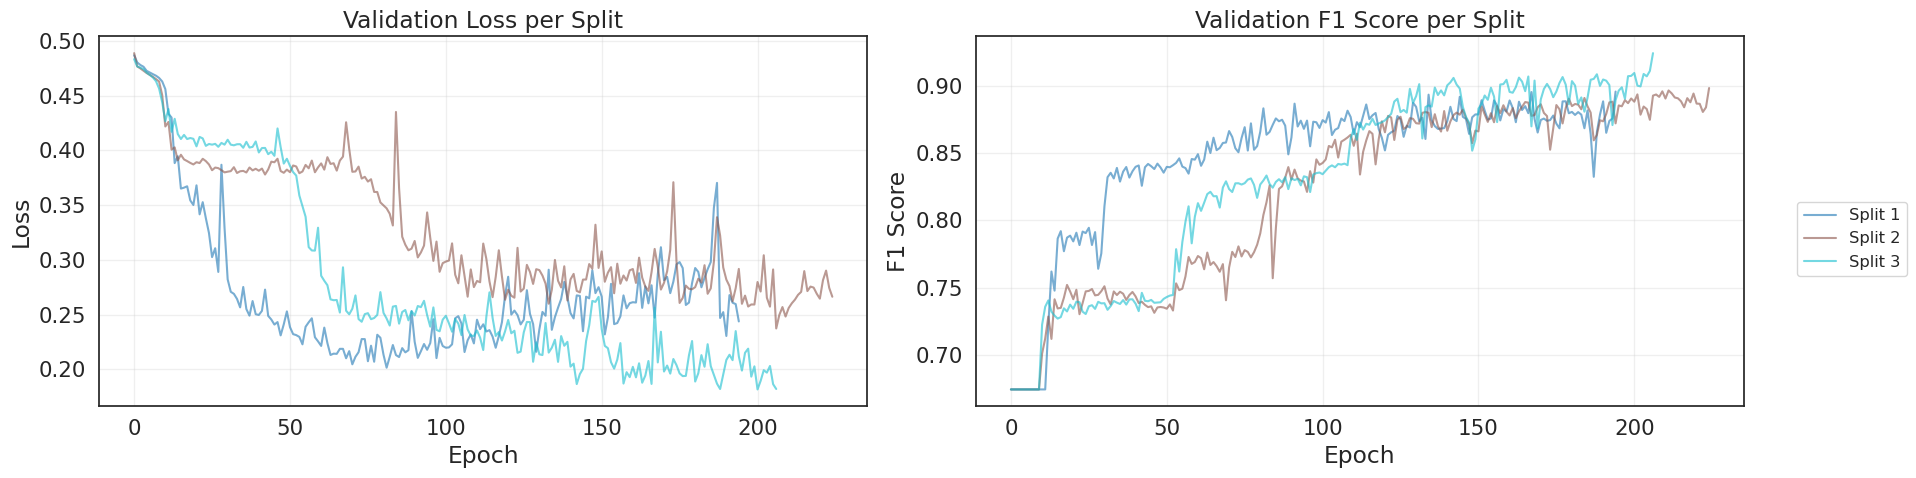

In [ ]:
# @title Plot Hitory
# Create figure with two subplots sharing x axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5), sharex=True)

# Color palette for K splits
colors = plt.cm.get_cmap('tab10', K)

# Plot validation loss for each split
for split in range(K):
    axes[0].plot(losses[f'split_{split}'][:-PATIENCE_KFOLD], label=f'Split {split+1}',
                 color=colors(split), alpha=0.6)
axes[0].set_title('Validation Loss per Split')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].grid(alpha=0.3)

# Plot validation F1 score for each split
for split in range(K):
    axes[1].plot(metrics[f'split_{split}'][:-PATIENCE_KFOLD], label=f'Split {split+1}',
                 color=colors(split), alpha=0.6)
axes[1].set_title('Validation F1 Score per Split')
axes[1].set_ylabel('F1 Score')
axes[1].set_xlabel('Epoch')
axes[1].grid(alpha=0.3)

# Add shared legend on the right
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.975)
plt.show()

# Confusion matrices


Elaborazione split 1/3...

Elaborazione split 2/3...

Elaborazione split 3/3...


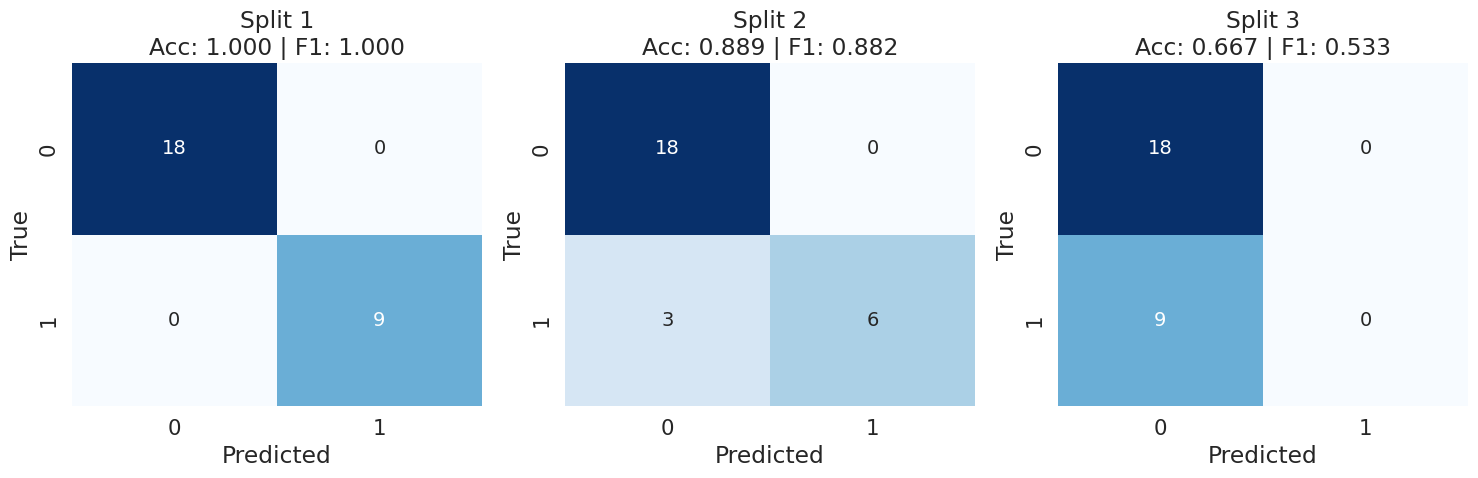

In [ ]:
# Layout dei subplot: 3 per riga
ncols = min(3, K)
nrows = int(np.ceil(K / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
axes = axes.flatten() if K > 1 else [axes]

class_names = ['no_pain', 'low_pain', 'high_pain']

for split_idx in range(K):
    print(f"\nElaborazione split {split_idx+1}/{K}...")

    # Ricostruisci split utenti
    user_labels = (
        data.groupby('sample_index')['label']
        .agg(lambda x: x.value_counts().index[0])
        .reset_index()
    )

    train_users, temp_users = train_test_split(
        user_labels['sample_index'],
        test_size=(N_VAL_USERS + N_TEST_USERS) / len(user_labels),
        stratify=user_labels['label'],
        random_state=SEED + split_idx
    )

    temp_labels = user_labels[user_labels['sample_index'].isin(temp_users)]
    val_users, test_users = train_test_split(
        temp_labels['sample_index'],
        test_size=N_TEST_USERS / (N_VAL_USERS + N_TEST_USERS),
        stratify=temp_labels['label'],
        random_state=SEED + split_idx
    )

    # Validation set
    df_val = data[data['sample_index'].isin(val_users)].copy()
    df_train = data[data['sample_index'].isin(train_users)].copy()

    # Map labels
    label_mapping = {'no_pain': 0, 'low_pain': 1, 'high_pain': 2}
    df_val['label'] = df_val['label'].map(label_mapping)
    df_train['label'] = df_train['label'].map(label_mapping)

    # Normalizzazione
    scale_columns = [col for col in df_train.columns
                     if (col.startswith('joint_') or col.startswith('pain_survey')) and not col.startswith('joint_30')]
    mins_train = df_train[scale_columns].min()
    maxs_train = df_train[scale_columns].max()
    for col in scale_columns:
        df_val[col] = (df_val[col] - mins_train[col]) / (maxs_train[col] - mins_train[col])

    # Rimuovi joint_30
    if 'joint_30' in df_val.columns:
        df_val = df_val.drop(columns=['joint_30'])

    # Sequenze validation
    X_val, y_val = build_sequences(df_val, window=WINDOW_SIZE, stride=STRIDE)
    X_val = np.nan_to_num(X_val.astype('float32'))
    y_val = np.nan_to_num(y_val.astype('int64'))

    val_ds = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
    val_loader = make_loader(val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

    # Carica modello
    model = RecurrentClassifier(
        input_size=in_features_model,
        hidden_size=HIDDEN_SIZE,
        num_layers=HIDDEN_LAYERS,
        num_classes=global_num_classes,
        dropout_rate=DROPOUT_RATE,
        bidirectional=BIDIRECTIONAL,
        rnn_type=RNN_TYPE
    ).to(device)
    model.load_state_dict(trained_models[f"split_{split_idx}"])
    model.eval()

    # Predizioni
    all_preds, all_labels = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            preds = model(xb).argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(yb.numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # Confusion matrix (forza 3x3)
    cm = confusion_matrix(all_labels, all_preds, labels=[0,1,2])
    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')

    # Plot
    ax = axes[split_idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=class_names, yticklabels=class_names, cbar=False)
    ax.set_title(f"Split {split_idx+1}\nAcc: {acc:.3f} | F1: {f1:.3f}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

# Rimuovi eventuali subplot vuoti
for j in range(split_idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## GRID SEARCH: HYPERPARAMETERS TUNING

In [ ]:
from sklearn.model_selection import ParameterGrid

GRID_EPOCHS = 500
GRID_PATIENCE = 40
param_grid = {
    'RNN_TYPE': ['LSTM'],
    'BIDIRECTIONAL': [True],
    'HIDDEN_SIZE': [5, 10, 15, 20, 25, 30, 105, 110, 115, 120, 125, 130],
    'HIDDEN_LAYERS': [2],
    'LEARNING_RATE': [1e-3],
    'DROPOUT_RATE': [0.3],
    'BATCH_SIZE': [512],
    'L1_LAMBDA': [0.00001],
    'L2_LAMBDA': [0.001],
    'WINDOW': [64],
    'STRIDE': [16],
    'CRITERION': ['FOCAL'], #CROSS or FOCAL
    'WEIGHTS': [[1.0, 1.0, 1.0]], # Only if CrossEntropy
    'GAMMA': [1.0], #Only if FocalLoss
}

results = []
grid = list(ParameterGrid(param_grid))

## Loop the grid

In [ ]:
%%time
print(f'Running {len(grid)} configurations...')

import os, math, copy, time

# --- ensure output directories exist ---
os.makedirs(str(logs_dir), exist_ok=True)

best_val_f1 = float('-inf')
best_params = None
best_training_history = None
best_state_dict = None
best_model_path = None
best_run_idx = None
best_epoch_in_run = None
results = []

# Re-define FocalLoss class here to ensure it's available
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.ce = nn.CrossEntropyLoss(weight=alpha, reduction='none')

    def forward(self, inputs, targets):
        ce_loss = self.ce(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss
        return focal_loss.mean()

# Re-define RecurrentClassifier class here to ensure it's available
class RecurrentClassifier(nn.Module):
    """
    Generic RNN classifier (RNN, LSTM, GRU).
    Uses the last hidden state for classification.
    """
    def __init__(
            self,
            input_size,
            hidden_size,
            num_layers,
            num_classes,
            rnn_type,        # 'RNN', 'LSTM', or 'GRU'
            bidirectional,
            dropout_rate=0.2
            ):
        super().__init__()

        self.rnn_type = rnn_type
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.bidirectional = bidirectional

        # Map string name to PyTorch RNN class
        rnn_map = {
            'RNN': nn.RNN,
            'LSTM': nn.LSTM,
            'GRU': nn.GRU
        }

        if rnn_type not in rnn_map:
            raise ValueError("rnn_type must be 'RNN', 'LSTM', or 'GRU'")

        rnn_module = rnn_map[rnn_type]

        # Dropout is only applied between layers (if num_layers > 1)
        dropout_val = dropout_rate if num_layers > 1 else 0 # dropout between RNN layers, applied for regularization

        # Create the recurrent layer
        self.rnn = rnn_module(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,       # Input shape: (batch, seq_len, features)
            bidirectional=bidirectional, # We are defining a bidirectional RNN since we want to extract also the future contextual information for making better predictions
            dropout=dropout_val
        )

        # Calculate input size for the final classifier
        if self.bidirectional:
            classifier_input_size = hidden_size * 2 # Concat fwd + bwd
        else:
            classifier_input_size = hidden_size

        # Final classification layer
        self.classifier = nn.Linear(classifier_input_size, num_classes) # output layer for classifying

    def forward(self, x):
        """
        x shape: (batch_size, seq_length, input_size)
        """

        # rnn_out shape: (batch_size, seq_len, hidden_size * num_directions)
        rnn_out, hidden = self.rnn(x) # feeds the input sequence into the RNN layer
        # rnn_out -> contains the hidden state output for every timestep

        # LSTM returns (h_n, c_n), we only need h_n
        if self.rnn_type == 'LSTM':
            hidden = hidden[0]  # final hidden state of the last timestep

        # hidden shape: (num_layers * num_directions, batch_size, hidden_size)

        if self.bidirectional:
            # Reshape to (num_layers, 2, batch_size, hidden_size)
            hidden = hidden.view(self.num_layers, 2, -1, self.hidden_size)

            # Concat last fwd (hidden[-1, 0, ...]) and bwd (hidden[-1, 1, ...])
            # Final shape: (batch_size, hidden_size * 2)
            hidden_to_classify = torch.cat([hidden[-1, 0, :, :], hidden[-1, 1, :, :]], dim=1)
        else:
            # Take the last layer's hidden state
            # Final shape: (batch_size, hidden_size)
            hidden_to_classify = hidden[-1]

        # Get logits
        logits = self.classifier(hidden_to_classify)
        return logits


for idx, params in enumerate(grid, 1):
    start_time = time.perf_counter()
    print(f"\nConfiguration {idx}/{len(grid)}: {params}")
    #Set up Criterion
    weights = torch.tensor(params['WEIGHTS']).to(device)

    if params['CRITERION'] == 'CROSS':
      criterion = nn.CrossEntropyLoss(weight=weights)
    else:
      criterion = FocalLoss(alpha=None, gamma=params['GAMMA'])
    #Build Sequence for the grid step
    WINDOW_GRID = params['WINDOW']
    STRIDE_GRID = params['STRIDE']
    # Generate sequences and labels for the training set
    X_train, y_train = build_sequences(df_train, WINDOW_GRID, STRIDE_GRID)
    # Generate sequences and labels for the validation set
    X_val, y_val = build_sequences(df_val, WINDOW_GRID, STRIDE_GRID)
    X_train = X_train.astype('float32')
    X_val = X_val.astype('float32')
    # Define the input shape based on the training data
    input_shape = X_train.shape[1:]
    # Define the number of classes based on the categorical labels
    num_classes = len(np.unique(y_train))
    # Discard nan values from the dataset
    if np.isnan(X_train).any() or np.isnan(X_val).any() or np.isnan(X_test).any():
        X_train = np.nan_to_num(X_train)
        X_val = np.nan_to_num(X_val)
    train_ds = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
    val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
    train_loader = make_loader(train_ds, batch_size=params['BATCH_SIZE'], shuffle=True, drop_last=False)
    val_loader   = make_loader(val_ds, batch_size=params['BATCH_SIZE'], shuffle=False, drop_last=False)
    print(f"Training set size: {len(train_ds)}")
    print(f"Validation set size: {len(val_ds)}")


    # Build model
    rnn_model = RecurrentClassifier(
        input_size=input_shape[-1],
        hidden_size=params['HIDDEN_SIZE'],
        num_layers=params['HIDDEN_LAYERS'],
        num_classes=num_classes,
        dropout_rate=params['DROPOUT_RATE'],
        bidirectional=BIDIRECTIONAL,
        rnn_type=RNN_TYPE
    ).to(device)

    # Display architecture summary
    try:
        recurrent_summary(rnn_model, input_size=input_shape)
    except Exception as e:
        print(f"[warn] recurrent_summary failed: {e}")

    # Set up TensorBoard writer
    experiment_id = f"{EXPERIMENT_NAME}_{idx}"
    writer = SummaryWriter(f"./{logs_dir}/{experiment_id}")

    # Add model graph only once to save time/disk
    if idx == 1:
        try:
            x = torch.randn(1, input_shape[0], input_shape[1]).to(device)
            x_for_graph = x if getattr(rnn_model, "batch_first", True) else x.permute(1, 0, 2)
            writer.add_graph(rnn_model, x_for_graph)
        except Exception as e:
            print(f"[warn] Skipping add_graph: {e}")

    # Optimizer and AMP scaler
    optimizer = torch.optim.AdamW(
        rnn_model.parameters(),
        lr=params['LEARNING_RATE'],
        weight_decay=params['L2_LAMBDA']
    )
    scaler = torch.cuda.amp.GradScaler(enabled=(device.type == 'cuda'))

    # --- train model ---
    try:
        rnn_model, training_history = fit(
            model=rnn_model,
            train_loader=train_loader,
            val_loader=val_loader,
            l1_lambda=params['L1_LAMBDA'],
            l2_lambda=0.0, # Always set to zero because we are applying L2 Regularization in Optimizer
            epochs=GRID_EPOCHS,
            criterion=criterion,
            optimizer=optimizer,
            scaler=scaler,
            device=device,
            writer=None, # No Tensorboard saving
            verbose=10,
            experiment_name=experiment_id,
            patience=GRID_PATIENCE
        )

        # Extract metrics
        val_f1_series = [float(v) for v in training_history.get('val_f1', [])
                         if isinstance(v, (int, float)) and math.isfinite(v)]
        val_loss_series = [float(v) for v in training_history.get('val_loss', [])
                           if isinstance(v, (int, float)) and math.isfinite(v)]

        if val_f1_series and val_loss_series:
            run_best_f1 = max(val_f1_series)
            run_best_epoch = val_f1_series.index(run_best_f1) + 1
            run_best_val_loss = val_loss_series[run_best_epoch - 1]
            elapsed = time.perf_counter() - start_time

            print(f"[Run {idx}] Best val_f1 = {run_best_f1:.4f} (epoch {run_best_epoch})")

            # Save metrics for summary table
            results.append({
                'Run': idx,
                'Best_Epoch': run_best_epoch,
                'Best_Val_F1': run_best_f1,
                'Best_Val_Loss': run_best_val_loss,
                'Elapsed_s': elapsed,
                **params
            })

            # Track best model
            if run_best_f1 > best_val_f1:
                best_val_f1 = run_best_f1
                best_params = params
                best_training_history = training_history
                best_state_dict = copy.deepcopy(rnn_model.state_dict())
                best_run_idx = idx
                best_epoch_in_run = run_best_epoch
                #best_model_path = f"./{logs_dir}/{EXPERIMENT_NAME}_best.pt"
                #torch.save(best_state_dict, best_model_path)

        else:
            print("[warn] No valid val_f1 or val_loss values recorded for this run.")

    except Exception as e:
        print(f"[error] Training failed for configuration {idx}: {e}")

    finally:
        try:
            writer.close()
        except Exception:
            pass
        del optimizer, scaler, rnn_model
        if device.type == 'cuda':
            torch.cuda.empty_cache()

    print(f"Configuration {idx} completed in {time.perf_counter() - start_time:.1f}s")

# --- summary ---
print("\n" + "="*50)
print("                GRID SEARCH COMPLETE")
print("="*50)
if best_params is not None:
    print(f"Best run: #{best_run_idx} (epoch {best_epoch_in_run})")
    print(f"Best Validation F1 Score: {best_val_f1:.4f}")
    print(f"Best Parameters: {best_params}")
    if best_model_path:
        print(f"Best model saved to: {best_model_path}")
else:
    print("No successful runs (val_f1 was empty or invalid).")
print("="*50)

# --- results table ---
if results:
    df_results = pd.DataFrame(results)
    df_results = df_results.sort_values(by='Best_Val_F1', ascending=False).reset_index(drop=True)

    print("\nGrid Search Results Summary:")
    print(df_results.to_string(index=False))

    # Optionally save results to CSV
    results_path = f"./{logs_dir}/{EXPERIMENT_NAME}_grid_results.csv"
    df_results.to_csv(results_path, index=False)
    print(f"\nResults saved to: {results_path}")
else:
    print("No results to display.")

Running 12 configurations...

Configuration 1/12: {'BATCH_SIZE': 512, 'BIDIRECTIONAL': True, 'CRITERION': 'FOCAL', 'DROPOUT_RATE': 0.3, 'GAMMA': 1.0, 'HIDDEN_LAYERS': 2, 'HIDDEN_SIZE': 5, 'L1_LAMBDA': 1e-05, 'L2_LAMBDA': 0.001, 'LEARNING_RATE': 0.001, 'RNN_TYPE': 'LSTM', 'STRIDE': 16, 'WEIGHTS': [1.0, 1.0, 1.0], 'WINDOW': 64}
Training set size: 4482
Validation set size: 1440
-------------------------------------------------------------------------------
Layer (type)              Output Shape                 Param #           
rnn (LSTM)                [[-1, 64, 10], [4, -1, 5]]   2,440          
classifier (Linear)       [-1, 3]                      33             
Total params: 2,473
Trainable params: 2,473
Non-trainable params: 0
-------------------------------------------------------------------------------
Training 500 epochs...
Epoch   1/500 | Train: Loss=0.7553, F1 Score=0.0465 | Val: Loss=0.7117, F1 Score=0.1902
Epoch  10/500 | Train: Loss=0.4520, F1 Score=0.6742 | Val: Loss=0.4

## Recap of results and Plots

In [ ]:
results = pd.read_csv(results_path)
print(results.to_string(index=False))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Plot 1: Best_Val_F1 vs. L1_LAMBDA
plt.subplot(4, 2, 1)
sns.lineplot(data=results, x='L1_LAMBDA', y='Best_Val_F1', marker='o')
plt.title('Best Val F1 vs. L1 Lambda')
plt.xlabel('L1 Lambda')
plt.ylabel('F1')

# Plot 2: Best_Val_F1 vs. L2_LAMBDA
plt.subplot(4, 2, 2)
sns.lineplot(data=results, x='L2_LAMBDA', y='Best_Val_F1', marker='o')
plt.title('Best Val F1 vs. L2 Lambda')
plt.xlabel('L2 Lambda')
plt.ylabel('F1')

# Plot 3: Best_Val_F1 vs. STRIDE
plt.subplot(4, 2, 3)
sns.lineplot(data=results, x='STRIDE', y='Best_Val_F1', marker='o')
plt.title('Best Val F1 vs. Stride')
plt.xlabel('Stride')
plt.ylabel('F1')

# Plot 4: Best_Val_F1 vs. WINDOW
plt.subplot(4, 2, 4)
sns.lineplot(data=results, x='WINDOW', y='Best_Val_F1', marker='o')
plt.title('Best Val F1 vs. Window')
plt.xlabel('Window')
plt.ylabel('F1')

# Plot 5: Best_Val_F1 vs. Hidden Size
plt.subplot(4, 2, 5)
sns.lineplot(data=results, x='HIDDEN_SIZE', y='Best_Val_F1', marker='o')
plt.title('Best Val F1 vs. HIDDEN_SIZE')
plt.xlabel('HIDDEN_SIZE')
plt.ylabel('F1')

# Plot 6: Best_Val_F1 vs. L1_LAMBDA
plt.subplot(4, 2, 6)
sns.lineplot(data=results, x='HIDDEN_LAYERS', y='Best_Val_F1', marker='o')
plt.title('Best Val F1 vs. HIDDEN_LAYERS')
plt.xlabel('HIDDEN_LAYERS')
plt.ylabel('F1')

# Plot 7: Best_Val_F1 vs. L1_LAMBDA
plt.subplot(4, 2, 7)
sns.lineplot(data=results, x='DROPOUT_RATE', y='Best_Val_F1', marker='o')
plt.title('Best Val F1 vs. DROPOUT_RATE')
plt.xlabel('DROPOUT_RATE')
plt.ylabel('F1')

# Plot 8: Best_Val_F1 vs. L1_LAMBDA
plt.subplot(4, 2, 8)
sns.lineplot(data=results, x='GAMMA', y='Best_Val_F1', marker='o')
plt.title('Best Val F1 vs. gamma')
plt.xlabel('gamma')
plt.ylabel('F1')

plt.tight_layout()
plt.show()

## 14 Competition Submission

In [ ]:
# Build sequences from the actual test data
print(f"Building sequences for actual test dataset with WINDOW_SIZE={WINDOW_SIZE}, STRIDE={STRIDE}")

X_test_sequences = build_sequences_test(X_test_final_df)

# Discard nan values from the dataset
if np.isnan(X_test_sequences).any():
    X_test_sequences = np.nan_to_num(X_test_sequences)
    print("NaN values found and replaced with 0 in test sequences.")


# Create a TensorDataset from the test sequences (no labels needed for prediction)
test_ds_final = TensorDataset(torch.from_numpy(X_test_sequences))

# Create a DataLoader for the final test set
test_loader_final = make_loader(test_ds_final, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

print(f"Actual test sequences shape: {X_test_sequences.shape}")
print(f"Number of batches in final test loader: {len(test_loader_final)}")


# Create model with the correct input size (based on the feature columns used in sequences)
actual_input_size = X_test_sequences.shape[-1]
print(f"Model input size derived from test sequences: {actual_input_size}")

Building sequences for actual test dataset with WINDOW_SIZE=64, STRIDE=16
Actual test sequences shape: (1324, 200, 37)
Number of batches in final test loader: 3
Model input size derived from test sequences: 37


In [ ]:
# Show test_final
X_test_final_df

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_20,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29
0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.561563,...,0.000015,2.885370e-06,0.000033,0.000048,2.729749e-05,0.000406,0.014909,0.045098,0.012882,0.010178
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.599088,...,0.000015,2.879201e-06,0.000033,0.000060,2.123247e-05,0.000176,0.053679,0.055375,0.013892,0.029085
2,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.638365,...,0.000027,9.057689e-06,0.000033,0.000146,3.119309e-05,0.000049,0.042305,0.039620,0.016286,0.040638
3,0.0,3.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.554938,...,0.000015,6.191420e-06,0.000033,0.000047,3.196222e-05,0.000088,0.037477,0.031101,0.008568,0.018730
4,0.0,4.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.537192,...,0.000025,8.306708e-06,0.000045,0.000047,2.074579e-05,0.000048,0.015210,0.019426,0.008189,0.013444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211835,1323.0,155.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.746791,...,0.000025,9.231271e-07,0.000010,0.000007,2.260549e-07,0.000000,0.009774,0.031095,0.006292,0.070267
211836,1323.0,156.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.712191,...,0.000005,8.987565e-07,0.000010,0.000000,0.000000e+00,0.000000,0.027009,0.049113,0.029173,0.068884
211837,1323.0,157.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.778327,...,0.000004,8.742629e-07,0.000030,0.000018,0.000000e+00,0.000000,0.025910,0.042127,0.011971,0.079291
211838,1323.0,158.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.740327,...,0.000004,8.496463e-07,0.000041,0.000000,0.000000e+00,0.000000,0.052790,0.019468,0.015994,0.106760


In [ ]:
print(f"Model input size derived from test sequences: {actual_input_size}")

rnn_model = RecurrentClassifier(
    input_size=actual_input_size,
    hidden_size=HIDDEN_SIZE,
    num_layers=HIDDEN_LAYERS,
    num_classes=num_classes,
    dropout_rate=DROPOUT_RATE,
    bidirectional=BIDIRECTIONAL,
    rnn_type=RNN_TYPE
    ).to(device)

print(f"Model created with input_size={actual_input_size}, hidden_size={HIDDEN_SIZE}")
# It's good practice to summarize the model with the actual input shape it will receive
recurrent_summary(rnn_model, input_size=X_test_sequences.shape[1:])


# Load the trained model
model_path = MODEL_LOAD_PATH
# model_path ="/gdrive/MyDrive/pirate_dataset/models/LSTM_bi_10-11-22-23.pt"  # Example hardcoded path


try:
    # Load the state dict
    checkpoint = torch.load(model_path, map_location=device)
    rnn_model.load_state_dict(checkpoint)
    print(f"✓ Model successfully loaded from {model_path}")

    # Verify model architecture matches
    total_params = sum(p.numel() for p in rnn_model.parameters())
    print(f"✓ Model loaded with {total_params:,} parameters")

except FileNotFoundError:
    print(f"✗ ERROR: Model file not found at {model_path}")
    print("Please ensure the model was trained and saved properly.")
    print("You may need to retrain the model or check the file path.")
    # Exit or handle the error appropriately if the model cannot be loaded

except RuntimeError as e:
    print(f"✗ ERROR: Model architecture mismatch!")
    print(f"Error details: {str(e)}")
    print("\nThis usually happens when the saved model has a different architecture")
    print("than the current model definition (input_size, hidden_size, num_layers, bidirectional).")
    print("Please ensure the current model definition matches the saved model.")
    # Re-raise the exception after providing diagnostic information
    raise e


rnn_model.eval()  # Set model to evaluation mode

print("Starting inference on actual test set...")

# --- Inference Pipeline ---
final_test_preds = []
final_test_probabilities = []
sample_indices = []

print(f"Running inference on {len(test_loader_final)} batches...")

with torch.no_grad():  # Disable gradient computation for inference
    for batch_idx, inputs in enumerate(test_loader_final):
        # DataLoaders for prediction might return a tuple even with one tensor
        xb = inputs[0].to(device)

        # Verify batch dimensions
        if batch_idx == 0:
            print(f"Batch input shape: {xb.shape}")
            print(f"Expected: (batch_size, {WINDOW_SIZE}, {actual_input_size})")

        # Get model predictions
        logits = rnn_model(xb)
        preds = logits.argmax(dim=1).cpu().numpy()

        # Get probabilities for confidence analysis
        probabilities = torch.softmax(logits, dim=1).cpu().numpy()

        # Store batch results
        final_test_preds.append(preds)
        final_test_probabilities.append(probabilities)

        # Since test_loader_final is built from sequences, we need to map predictions back to original sample indices
        # The indices for this batch correspond to the sequences generated.
        # We'll need to figure out the mapping from sequence index to original sample_index later for the submission file.
        # For now, just store the predictions.

        # Progress indicator
        if (batch_idx + 1) % 10 == 0 or (batch_idx + 1) == len(test_loader_final):
            print(f"Processed batch {batch_idx + 1}/{len(test_loader_final)}")


# Combine all batches into single arrays
final_test_preds = np.concatenate(final_test_preds)
final_test_probabilities = np.concatenate(final_test_probabilities)

print(f"\nInference on actual test set completed successfully!")
print(f"Total predictions: {len(final_test_preds)}")
print(f"Predictions shape: {final_test_preds.shape}")
print(f"Probabilities shape: {final_test_probabilities.shape}")


# --- Create Submission File ---
# Map numerical predictions back to original labels
label_map = {0: "no_pain", 1: "low_pain", 2: "high_pain"}
pred_labels = [label_map[p] for p in final_test_preds]

# The sample_index for the submission file should correspond to the original sample_index from X_test_final_df
# Since build_sequences creates multiple sequences per sample_index (if stride < window),
# we need to associate each prediction with its original sample_index.
# A simple way is to assume each sequence corresponds to the sample_index it came from.
# This might not be perfectly accurate if predictions should be per-sample instead of per-sequence.
# For this submission, we'll create a submission row for each sequence prediction.

# Generate sample indices for the sequences
# The number of sequences is len(final_test_preds)
# We need to replicate the original sample_indices based on how many sequences were generated per sample.
# This requires re-running or adapting the logic from build_sequences to track original indices.

# A simpler approach for submission, if predictions are expected per original sample_index,
# is to average predictions per sample_index or take the majority vote.
# However, the competition usually expects one prediction per sequence/window if the model outputs per sequence.
# Let's assume the submission requires one prediction per sequence generated.

final_results = [] # Initialize final_results list

for sample_id in X_test_final_df['sample_index'].unique():

    # extract rows for this sample
    temp = X_test_final_df[X_test_final_df['sample_index'] == sample_id]

    # If the sample has fewer rows than WINDOW_SIZE, pad it with zeros
    if len(temp) < WINDOW_SIZE:
        padding = pd.DataFrame(0, index=np.arange(WINDOW_SIZE - len(temp)), columns=temp.columns)
        temp = pd.concat([temp, padding], ignore_index=True)

    # build sequences for this sample
    seqs = build_sequences_test(temp, window=WINDOW_SIZE, stride=STRIDE)  # shape: [num_windows, window, features]

    # sometimes build_sequences_test might still return zero sequences if len(temp) < stride
    if len(seqs) == 0:
        # fallback: take the last WINDOW_SIZE rows
        seqs = temp.iloc[-WINDOW_SIZE:].values[np.newaxis, :, :]

    seqs = torch.tensor(seqs, dtype=torch.float32).to(device)

    with torch.no_grad():
        logits = rnn_model(seqs)
        probs = torch.softmax(logits, dim=1).cpu().numpy()
        preds = np.argmax(probs, axis=1)

    # Final decision for this sample_index
    final_class = np.bincount(preds).argmax()  # majority vote
    final_results.append({
        "sample_index": sample_id,
        "prediction": label_map[final_class]
    })

submission = pd.DataFrame(final_results)
submission.to_csv(SUBMISSION_FILENAME, index=False)

print(submission.head())
print(f"✅ Saved submission with {len(submission)} rows should be 1324")

Model input size derived from test sequences: 37
Model created with input_size=37, hidden_size=64
-------------------------------------------------------------------------------
Layer (type)              Output Shape                 Param #           
rnn (LSTM)                [[-1, 200, 128], [4, -1, 64]] 152,064        
classifier (Linear)       [-1, 3]                      387            
Total params: 152,451
Trainable params: 152,451
Non-trainable params: 0
-------------------------------------------------------------------------------
✓ Model successfully loaded from models/LSTM_bi_11-11-15-55_model.pt
✓ Model loaded with 152,451 parameters
Starting inference on actual test set...
Running inference on 3 batches...
Batch input shape: torch.Size([512, 200, 37])
Expected: (batch_size, 64, 37)
Processed batch 3/3

Inference on actual test set completed successfully!
Total predictions: 1324
Predictions shape: (1324,)
Probabilities shape: (1324, 3)
   sample_index prediction
0         

### 15. Save Model Configuration

In [ ]:
# Gather all relevant model and training parameters
model_config = {
    'EXPERIMENT_NAME': EXPERIMENT_NAME,
    'RNN_TYPE': RNN_TYPE,
    'BIDIRECTIONAL': BIDIRECTIONAL,
    'input_size': input_shape[-1],
    'num_classes': num_classes,
    'HIDDEN_SIZE': HIDDEN_SIZE,
    'HIDDEN_LAYERS': HIDDEN_LAYERS,
    'DROPOUT_RATE': DROPOUT_RATE,
    'LEARNING_RATE': LEARNING_RATE,
    'EPOCHS': EPOCHS,
    'PATIENCE': PATIENCE,
    'L1_LAMBDA': L1_LAMBDA,
    'L2_LAMBDA': L2_LAMBDA,
    'BATCH_SIZE': BATCH_SIZE,
    'WINDOW_SIZE': WINDOW_SIZE,
    'STRIDE': STRIDE,
    'SEED': SEED,
    'one_pirate_window': one_pirate_window,
    # 'TEST_F1': f'{test_f1:.4f}'
}

# Define the path to save the config file
config_filepath = os.path.join(models_dir, f"{EXPERIMENT_NAME}_config.json")

# Save the dictionary as a JSON file
with open(config_filepath, 'w') as f:
    json.dump(model_config, f, indent=4)

print(f"✅ Model configuration saved to '{config_filepath}'")

# Display the saved configuration
print("\n--- Saved Model Configuration ---")
print(json.dumps(model_config, indent=4))
print("-----------------------------------")

✅ Model configuration saved to 'models/LSTM_bi_11-11-15-55_config.json'

--- Saved Model Configuration ---
{
    "EXPERIMENT_NAME": "LSTM_bi_11-11-15-55",
    "RNN_TYPE": "LSTM",
    "BIDIRECTIONAL": true,
    "input_size": 37,
    "num_classes": 3,
    "HIDDEN_SIZE": 64,
    "HIDDEN_LAYERS": 2,
    "DROPOUT_RATE": 0.22,
    "LEARNING_RATE": 0.001,
    "EPOCHS": 500,
    "PATIENCE": 50,
    "L1_LAMBDA": 1e-06,
    "L2_LAMBDA": 1e-05,
    "BATCH_SIZE": 512,
    "WINDOW_SIZE": 64,
    "STRIDE": 16,
    "SEED": 42,
    "one_pirate_window": true
}
-----------------------------------


In [ ]:
df_train.head(9)

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,label
0,0,0,1.0,0.0,1.0,0.5,2,2,2,0.777046,...,2.426544e-06,1.503263e-06,0.000105,0.000405,0.000004,0.014214,0.011376,0.018978,0.020291,0
1,0,1,1.0,1.0,1.0,1.0,2,2,2,0.805855,...,2.757563e-07,4.403064e-07,0.000158,0.000001,0.000000,0.010748,0.000000,0.009473,0.010006,0
2,0,2,1.0,0.0,1.0,1.0,2,2,2,0.767110,...,1.063529e-07,1.575589e-08,0.000038,0.000085,0.000003,0.013097,0.006830,0.017065,0.016856,0
3,0,3,1.0,1.0,1.0,1.0,2,2,2,0.665528,...,6.981461e-06,3.352260e-07,0.000049,0.000002,0.000000,0.009505,0.006274,0.020264,0.017981,0
4,0,4,1.0,1.0,1.0,1.0,2,2,2,0.773829,...,3.076737e-06,1.885071e-08,0.000041,0.000002,0.000007,0.004216,0.002132,0.023389,0.018477,0
5,0,5,1.0,0.0,1.0,0.5,2,2,2,0.813575,...,7.441192e-07,2.039074e-08,0.000008,0.000002,0.000008,0.004861,0.005427,0.023442,0.017338,0
6,0,6,1.0,0.5,1.0,0.5,2,2,2,0.728054,...,7.452509e-07,2.192577e-08,0.000052,0.000055,0.000005,0.005143,0.005407,0.022523,0.013901,0
7,0,7,1.0,1.0,1.0,1.0,2,2,2,0.737113,...,6.121956e-07,2.345575e-08,0.000058,0.000052,0.000000,0.012911,0.004546,0.025178,0.011477,0
8,0,8,1.0,1.0,0.0,0.5,2,2,2,0.698434,...,1.124017e-06,8.497671e-07,0.000008,0.000019,0.000000,0.016622,0.007172,0.006115,0.011130,0
